In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import cv2
from PIL import Image
import tifffile as tiff

mpl.rcParams.update({'font.size':50}) #make font bigger to match figsize

In [2]:
img_path = r'O:\Desktop\WORLDMAP\GHS_POP_E2015_GLOBE_R2019A_54009_1K_V1_0.tif'

In [3]:
img = tiff.imread(img_path)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


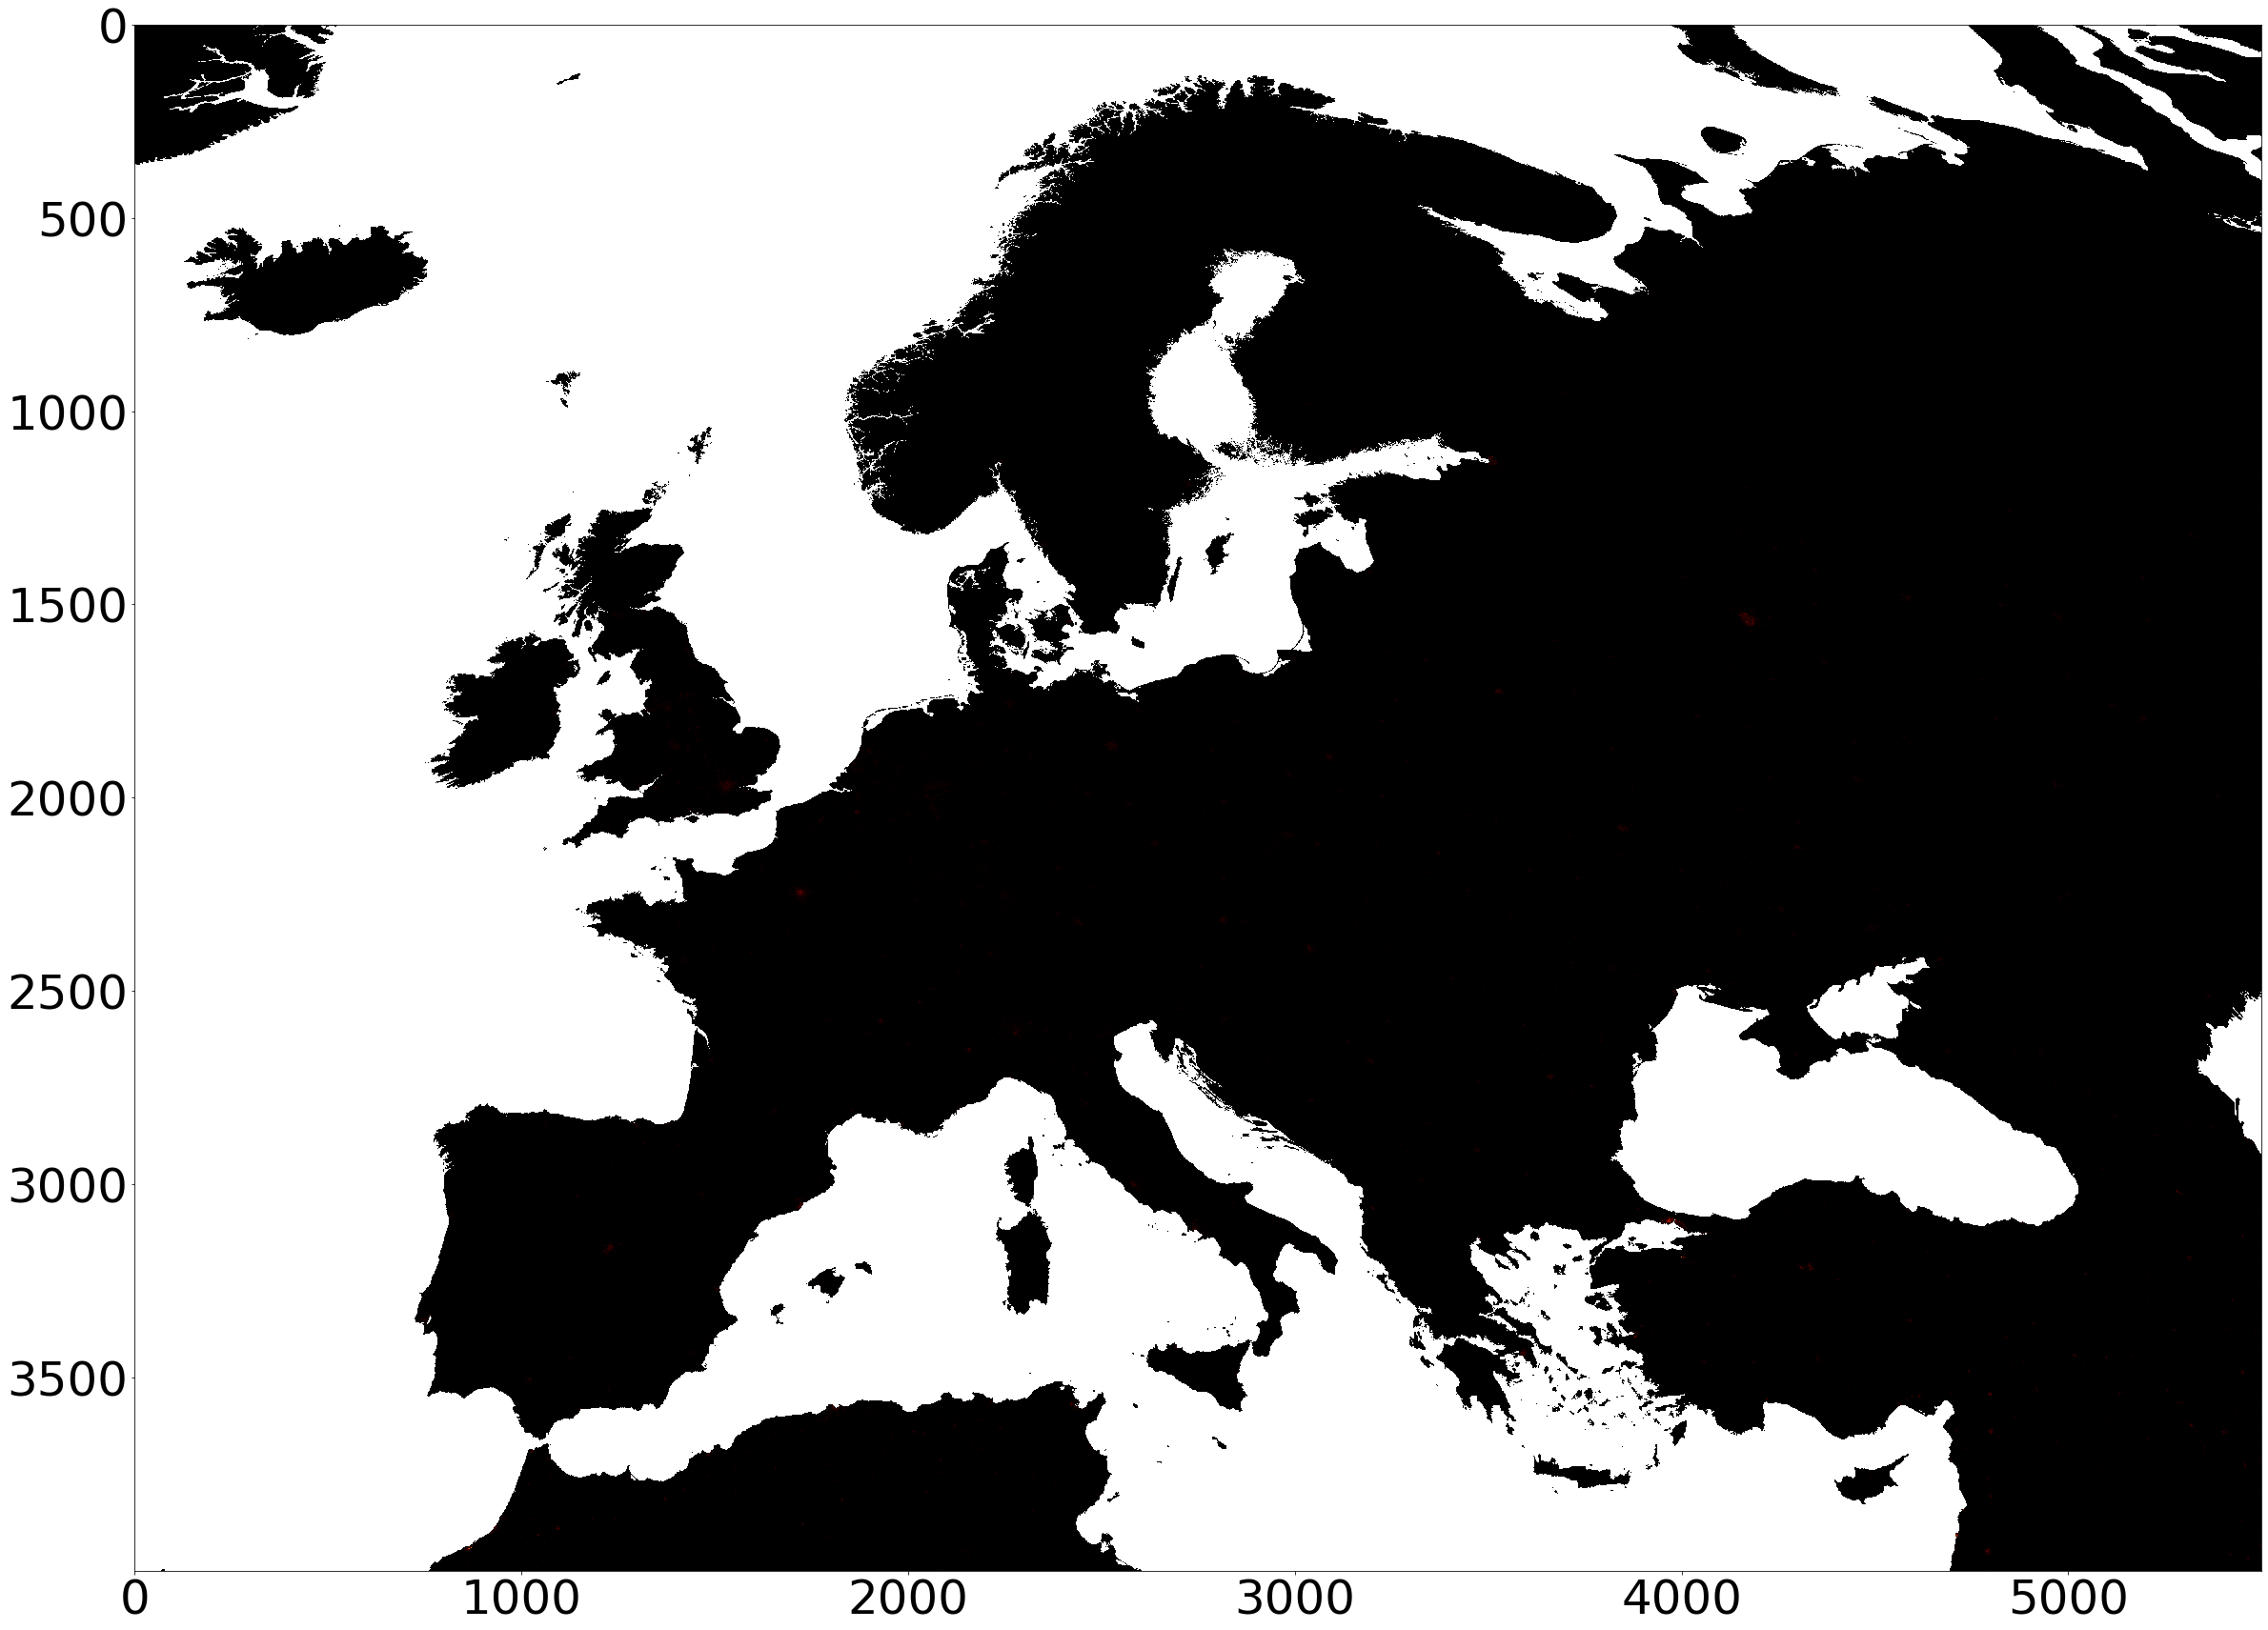

In [4]:
fig, ax = plt.subplots( figsize=(40, 40))
ax.imshow((img[1000:5000, 16500:22000]**0.5)**2, cmap="afmhot")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


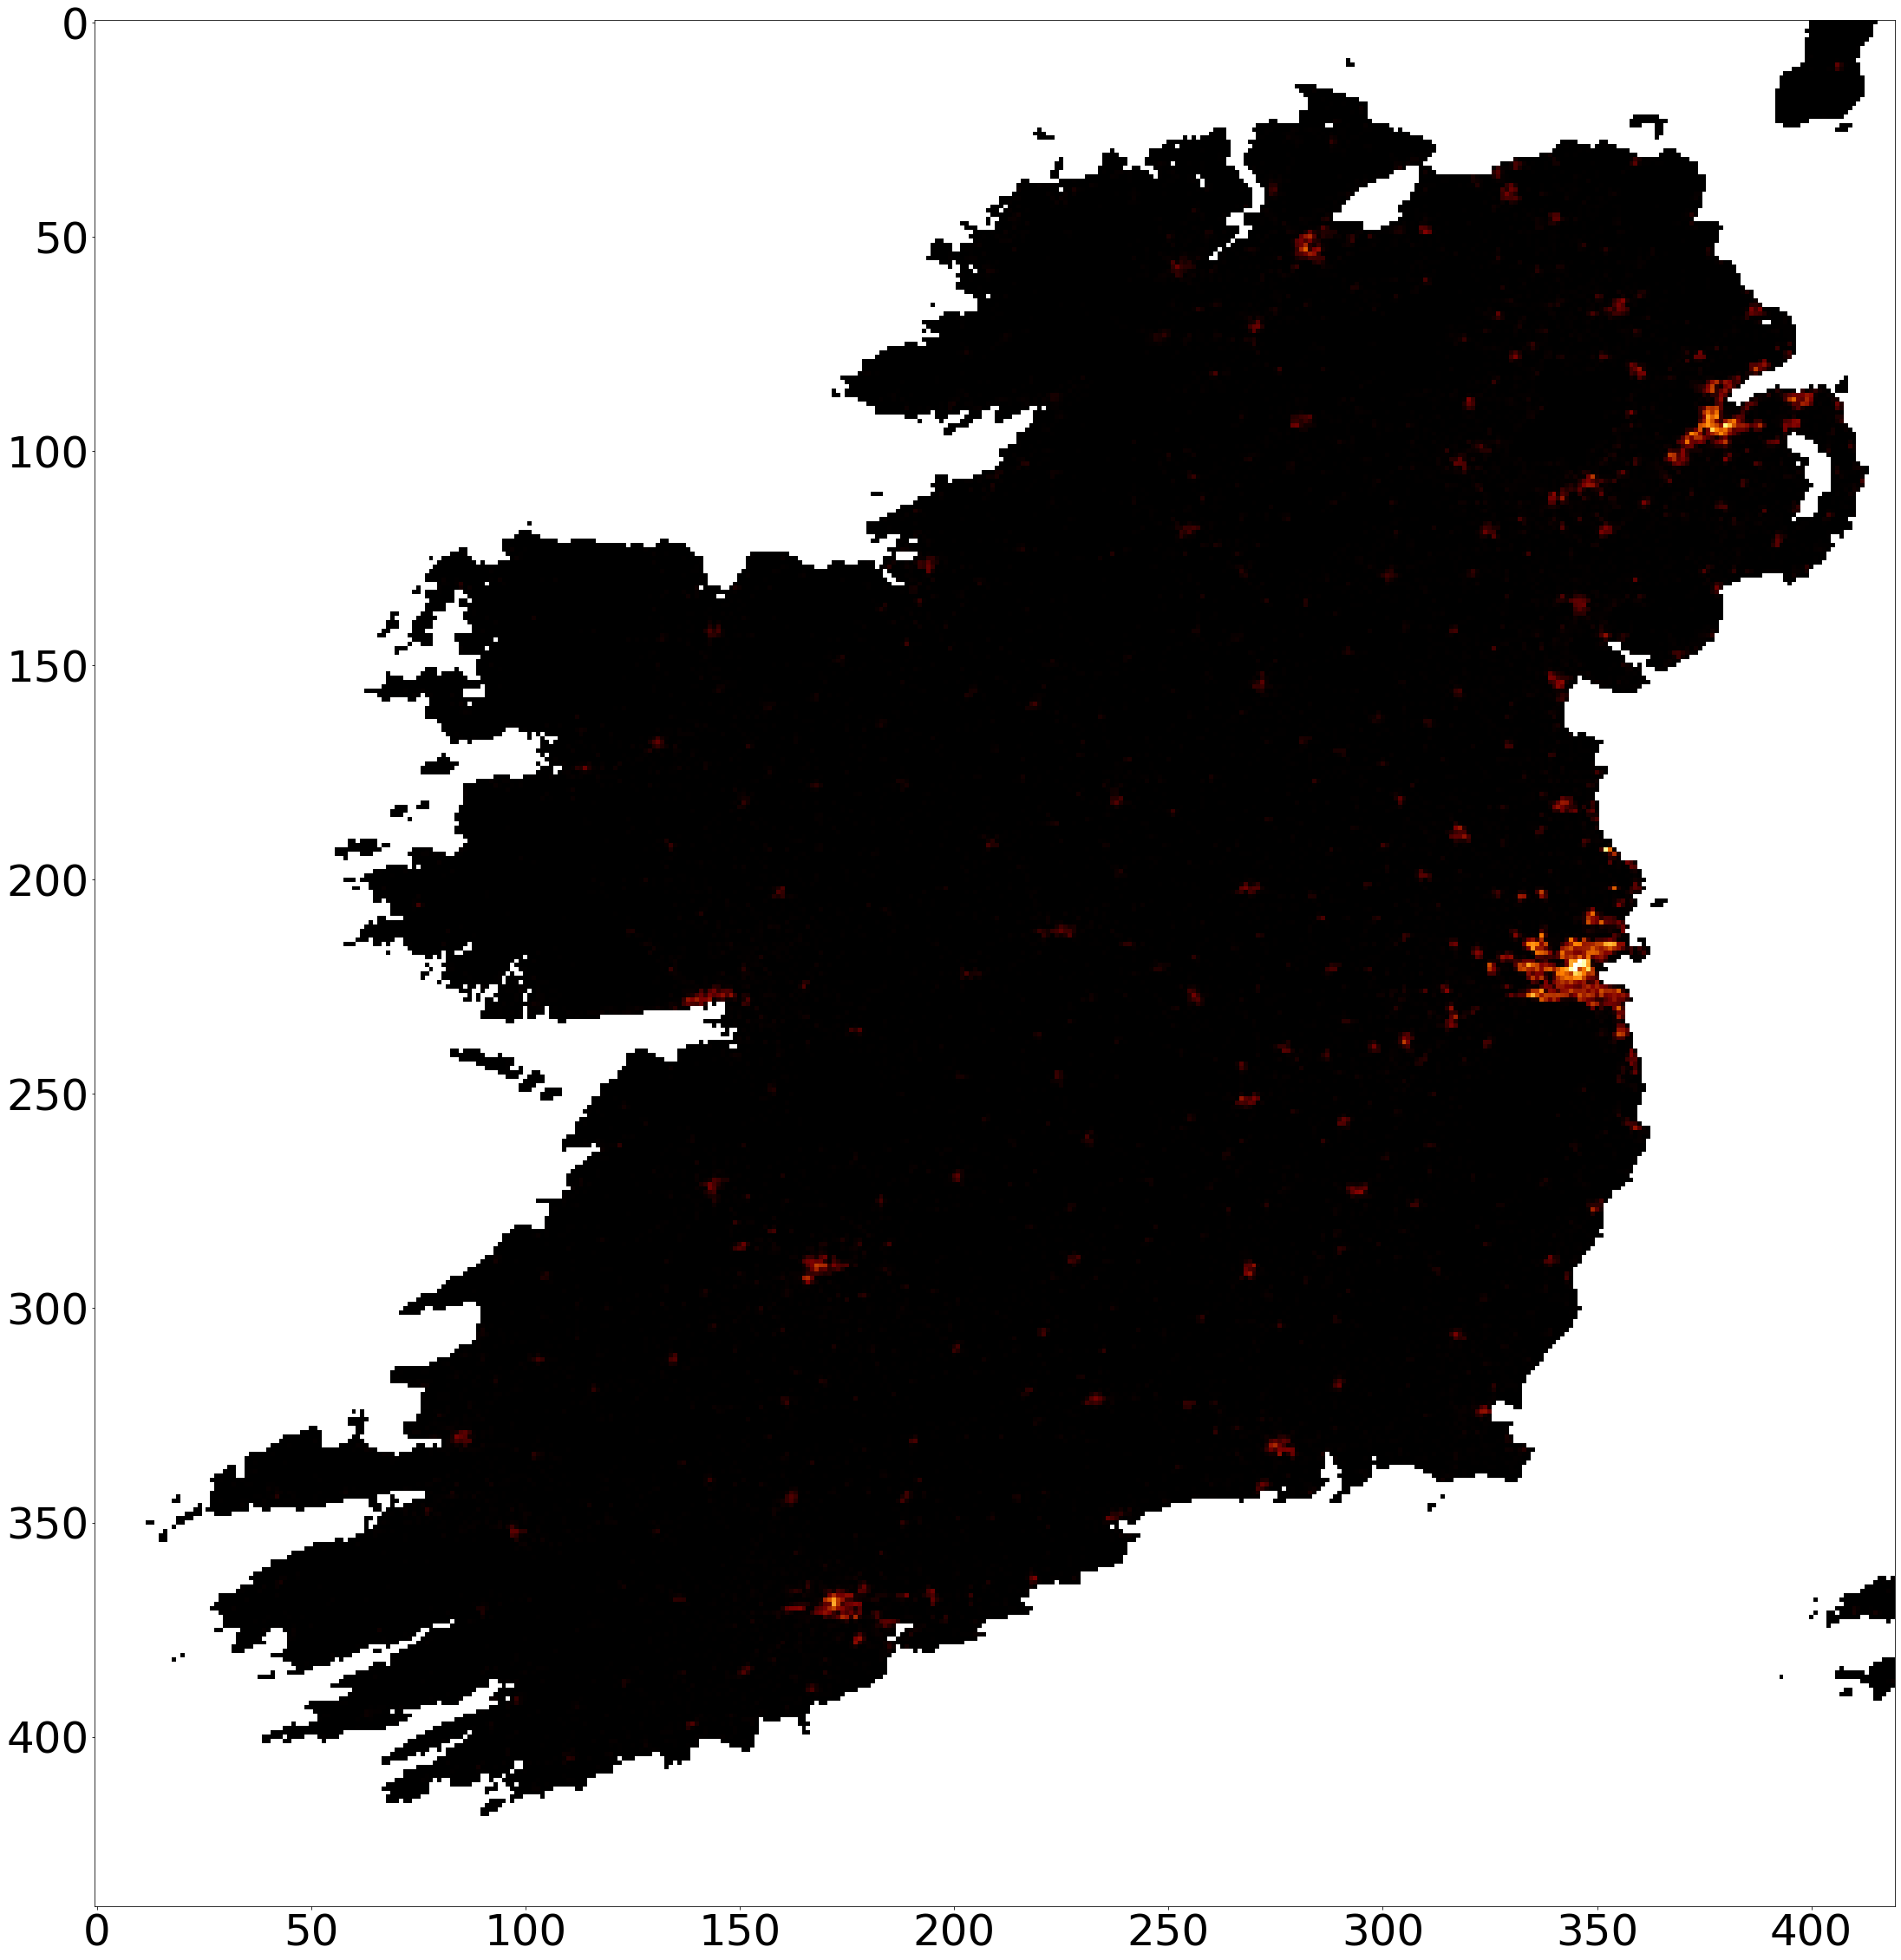

In [5]:
fig, ax = plt.subplots( figsize=(40, 40))
ax.imshow((img[2560:3000, 17240:17660]**0.5)**2, cmap="afmhot")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


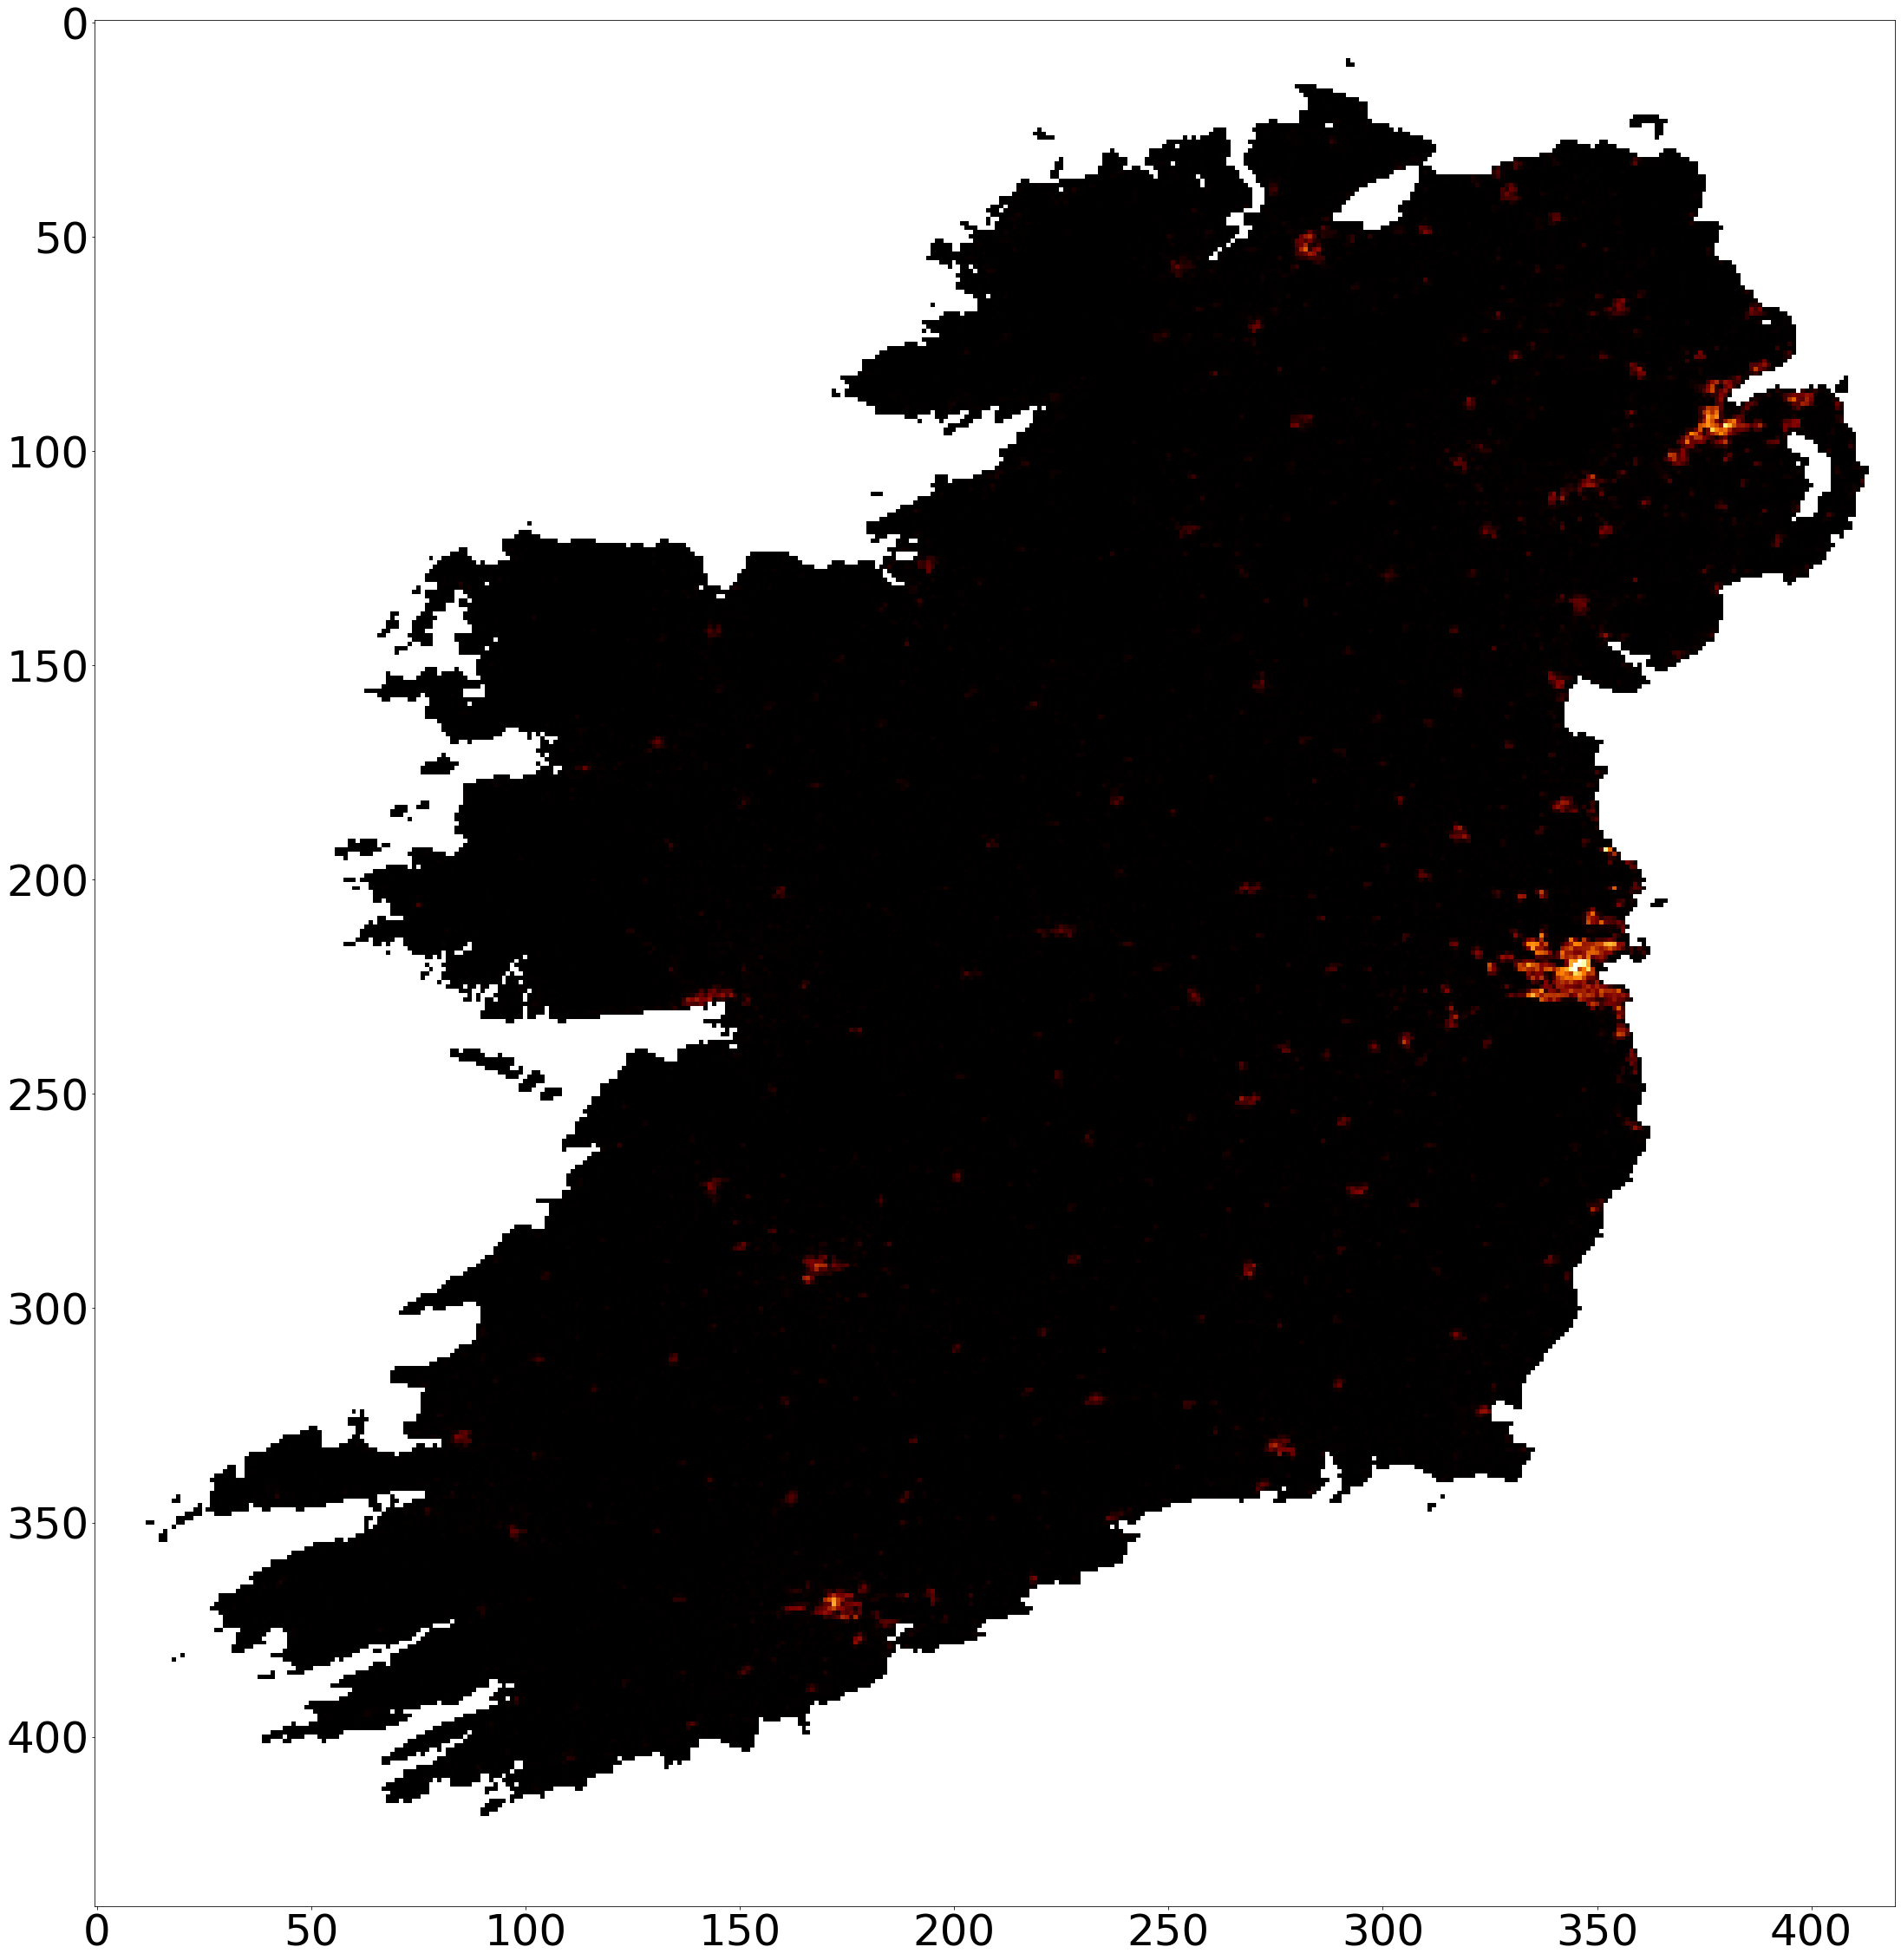

In [6]:
irl=img[2560:3000, 17240:17660]
irl[0:30, 370:420]=-200
irl[350:440, 370:420]=-200
fig, ax = plt.subplots( figsize=(40, 40))
ax.imshow((irl**0.5)**2, cmap="afmhot")

In [7]:
im = Image.fromarray(irl).convert('F')
export_image=np.asarray(im)

In [8]:
df = pd.DataFrame(data=export_image)
df.to_csv(r'O:\Desktop\WORLDMAP\IRELANDMAP.csv', sep=',', index=True)

In [9]:
df=pd.read_csv(r'O:\Desktop\WORLDMAP\IRELANDMAP.csv', index_col=0)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,410,411,412,413,414,415,416,417,418,419
0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,...,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0
1,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,...,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0
2,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,...,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0
3,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,...,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0
4,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,...,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in sqrt
  after removing the cwd from sys.path.


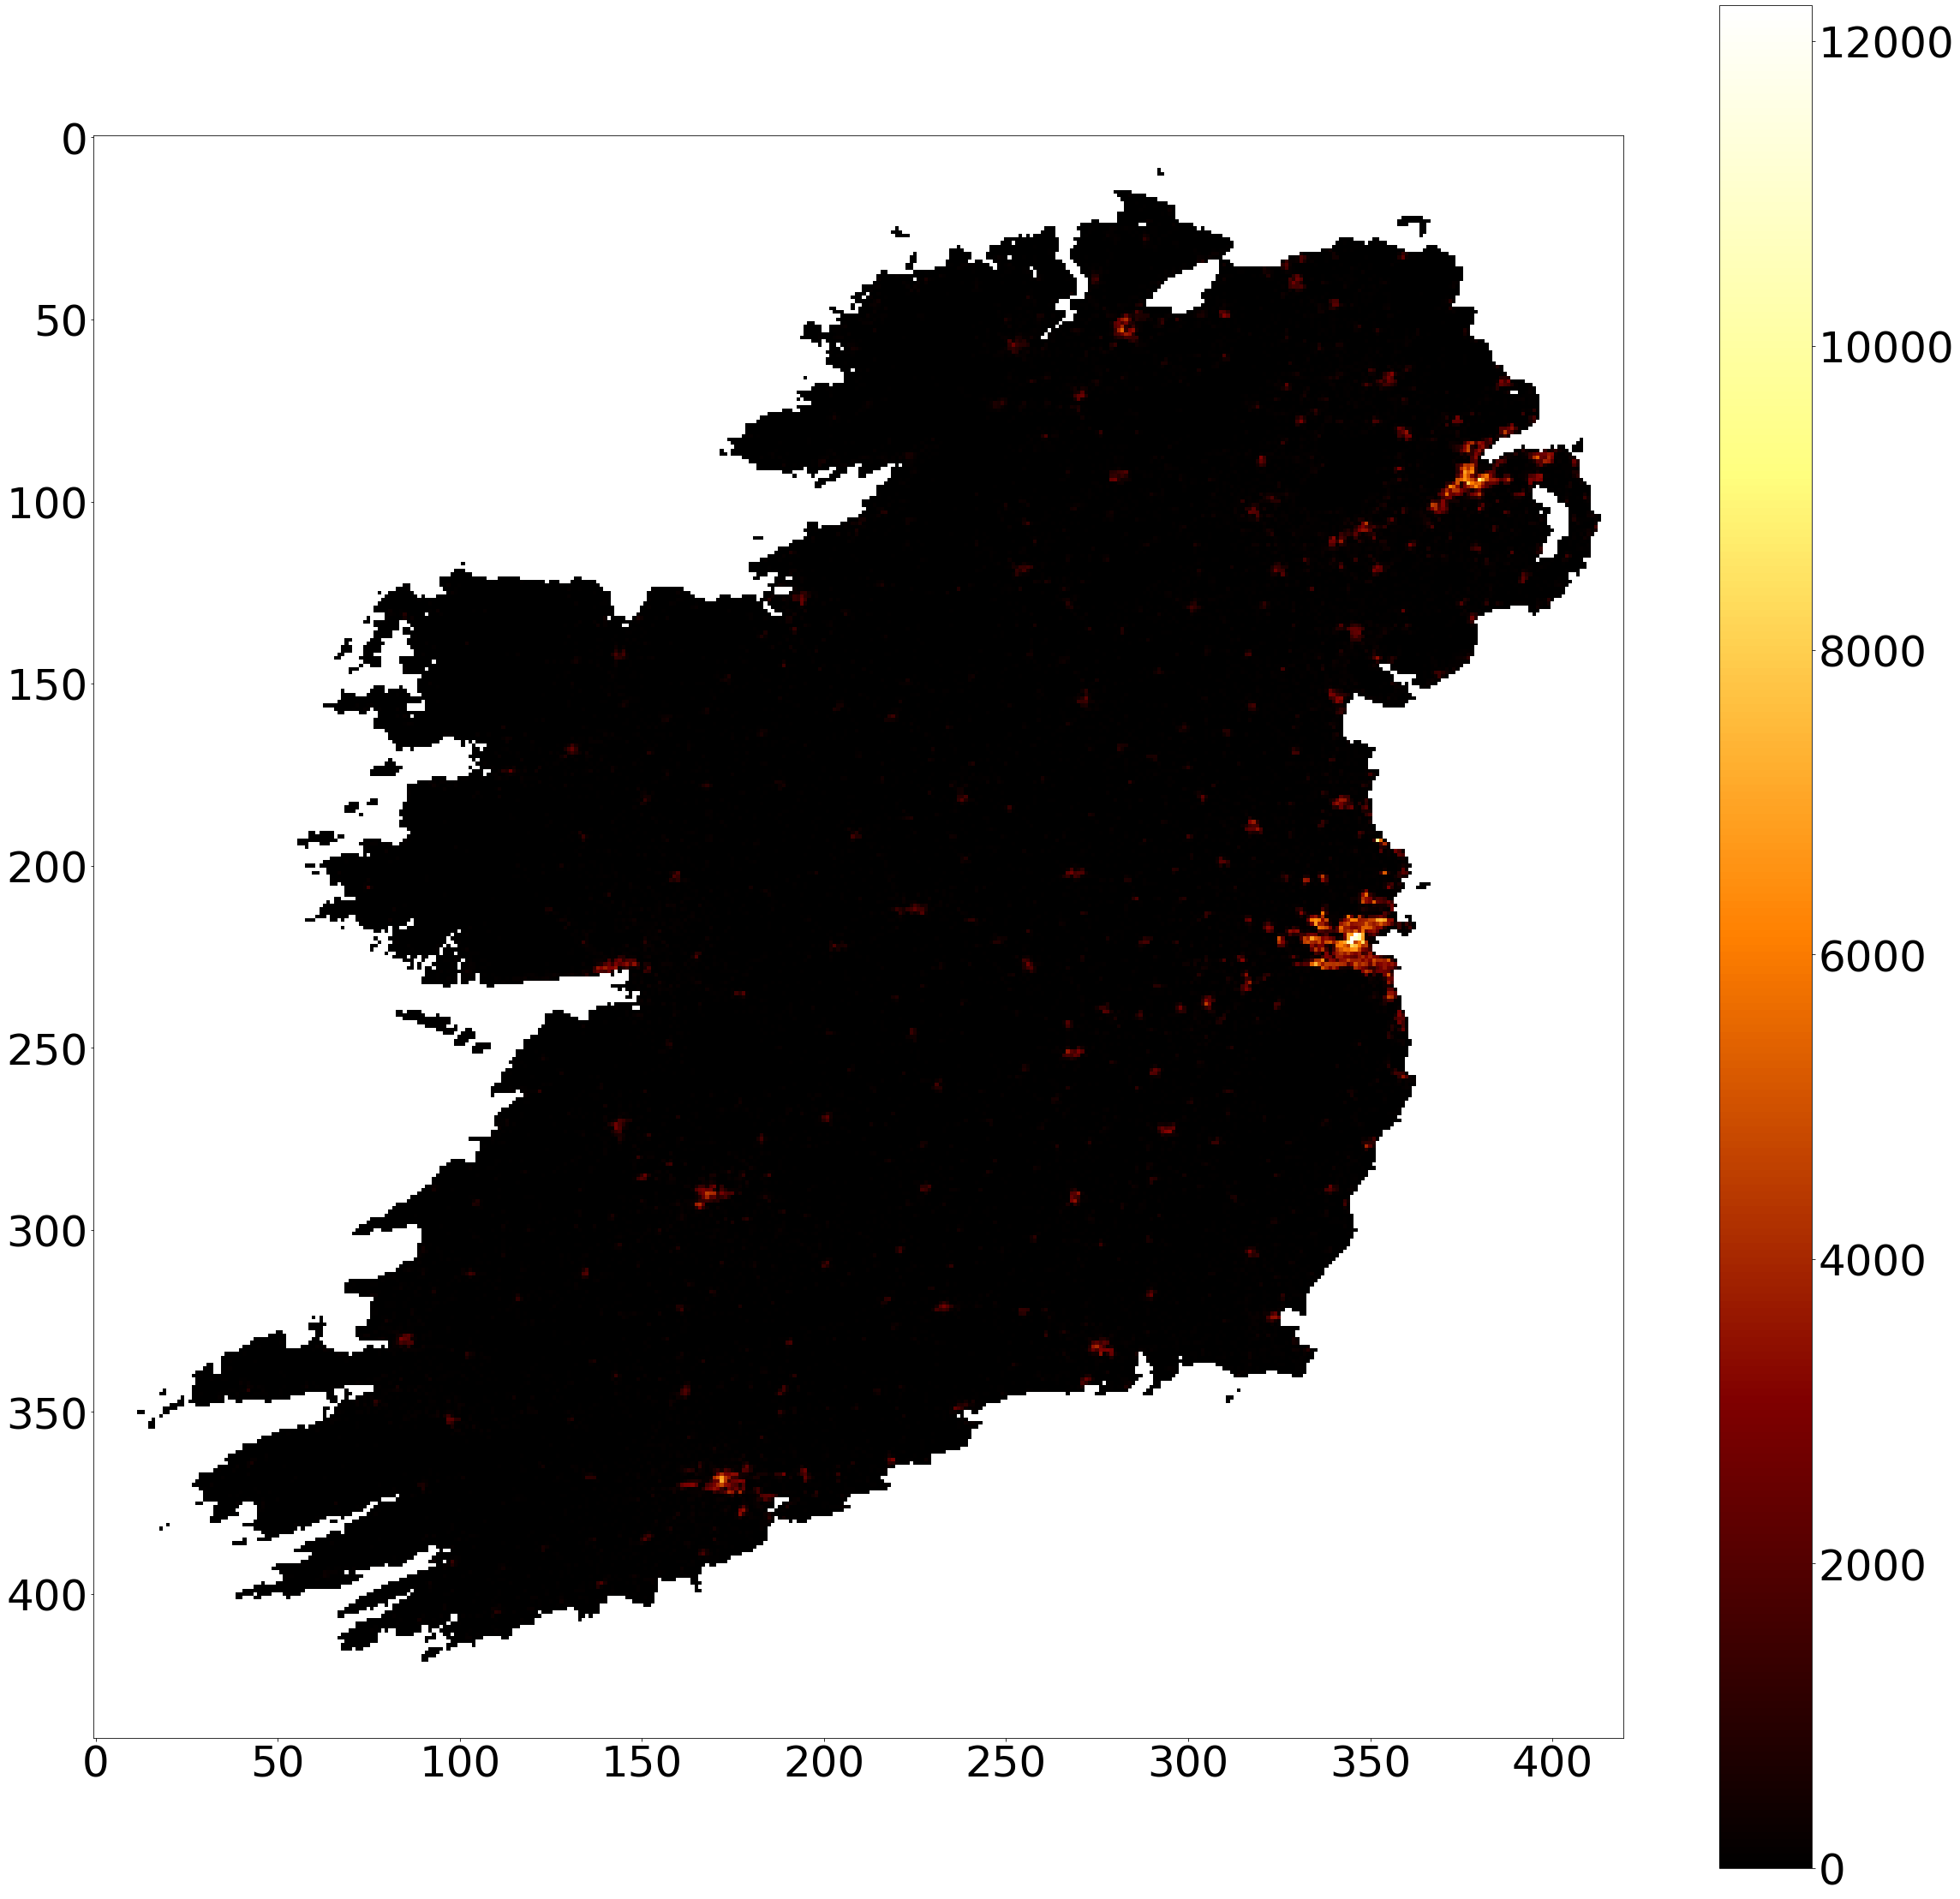

In [10]:
vals=df.values
vals=np.array(vals).astype('float')
fig, ax = plt.subplots( figsize=(40, 40))
plot=ax.imshow((vals**0.5)**2, cmap="afmhot")
fig.colorbar(plot)

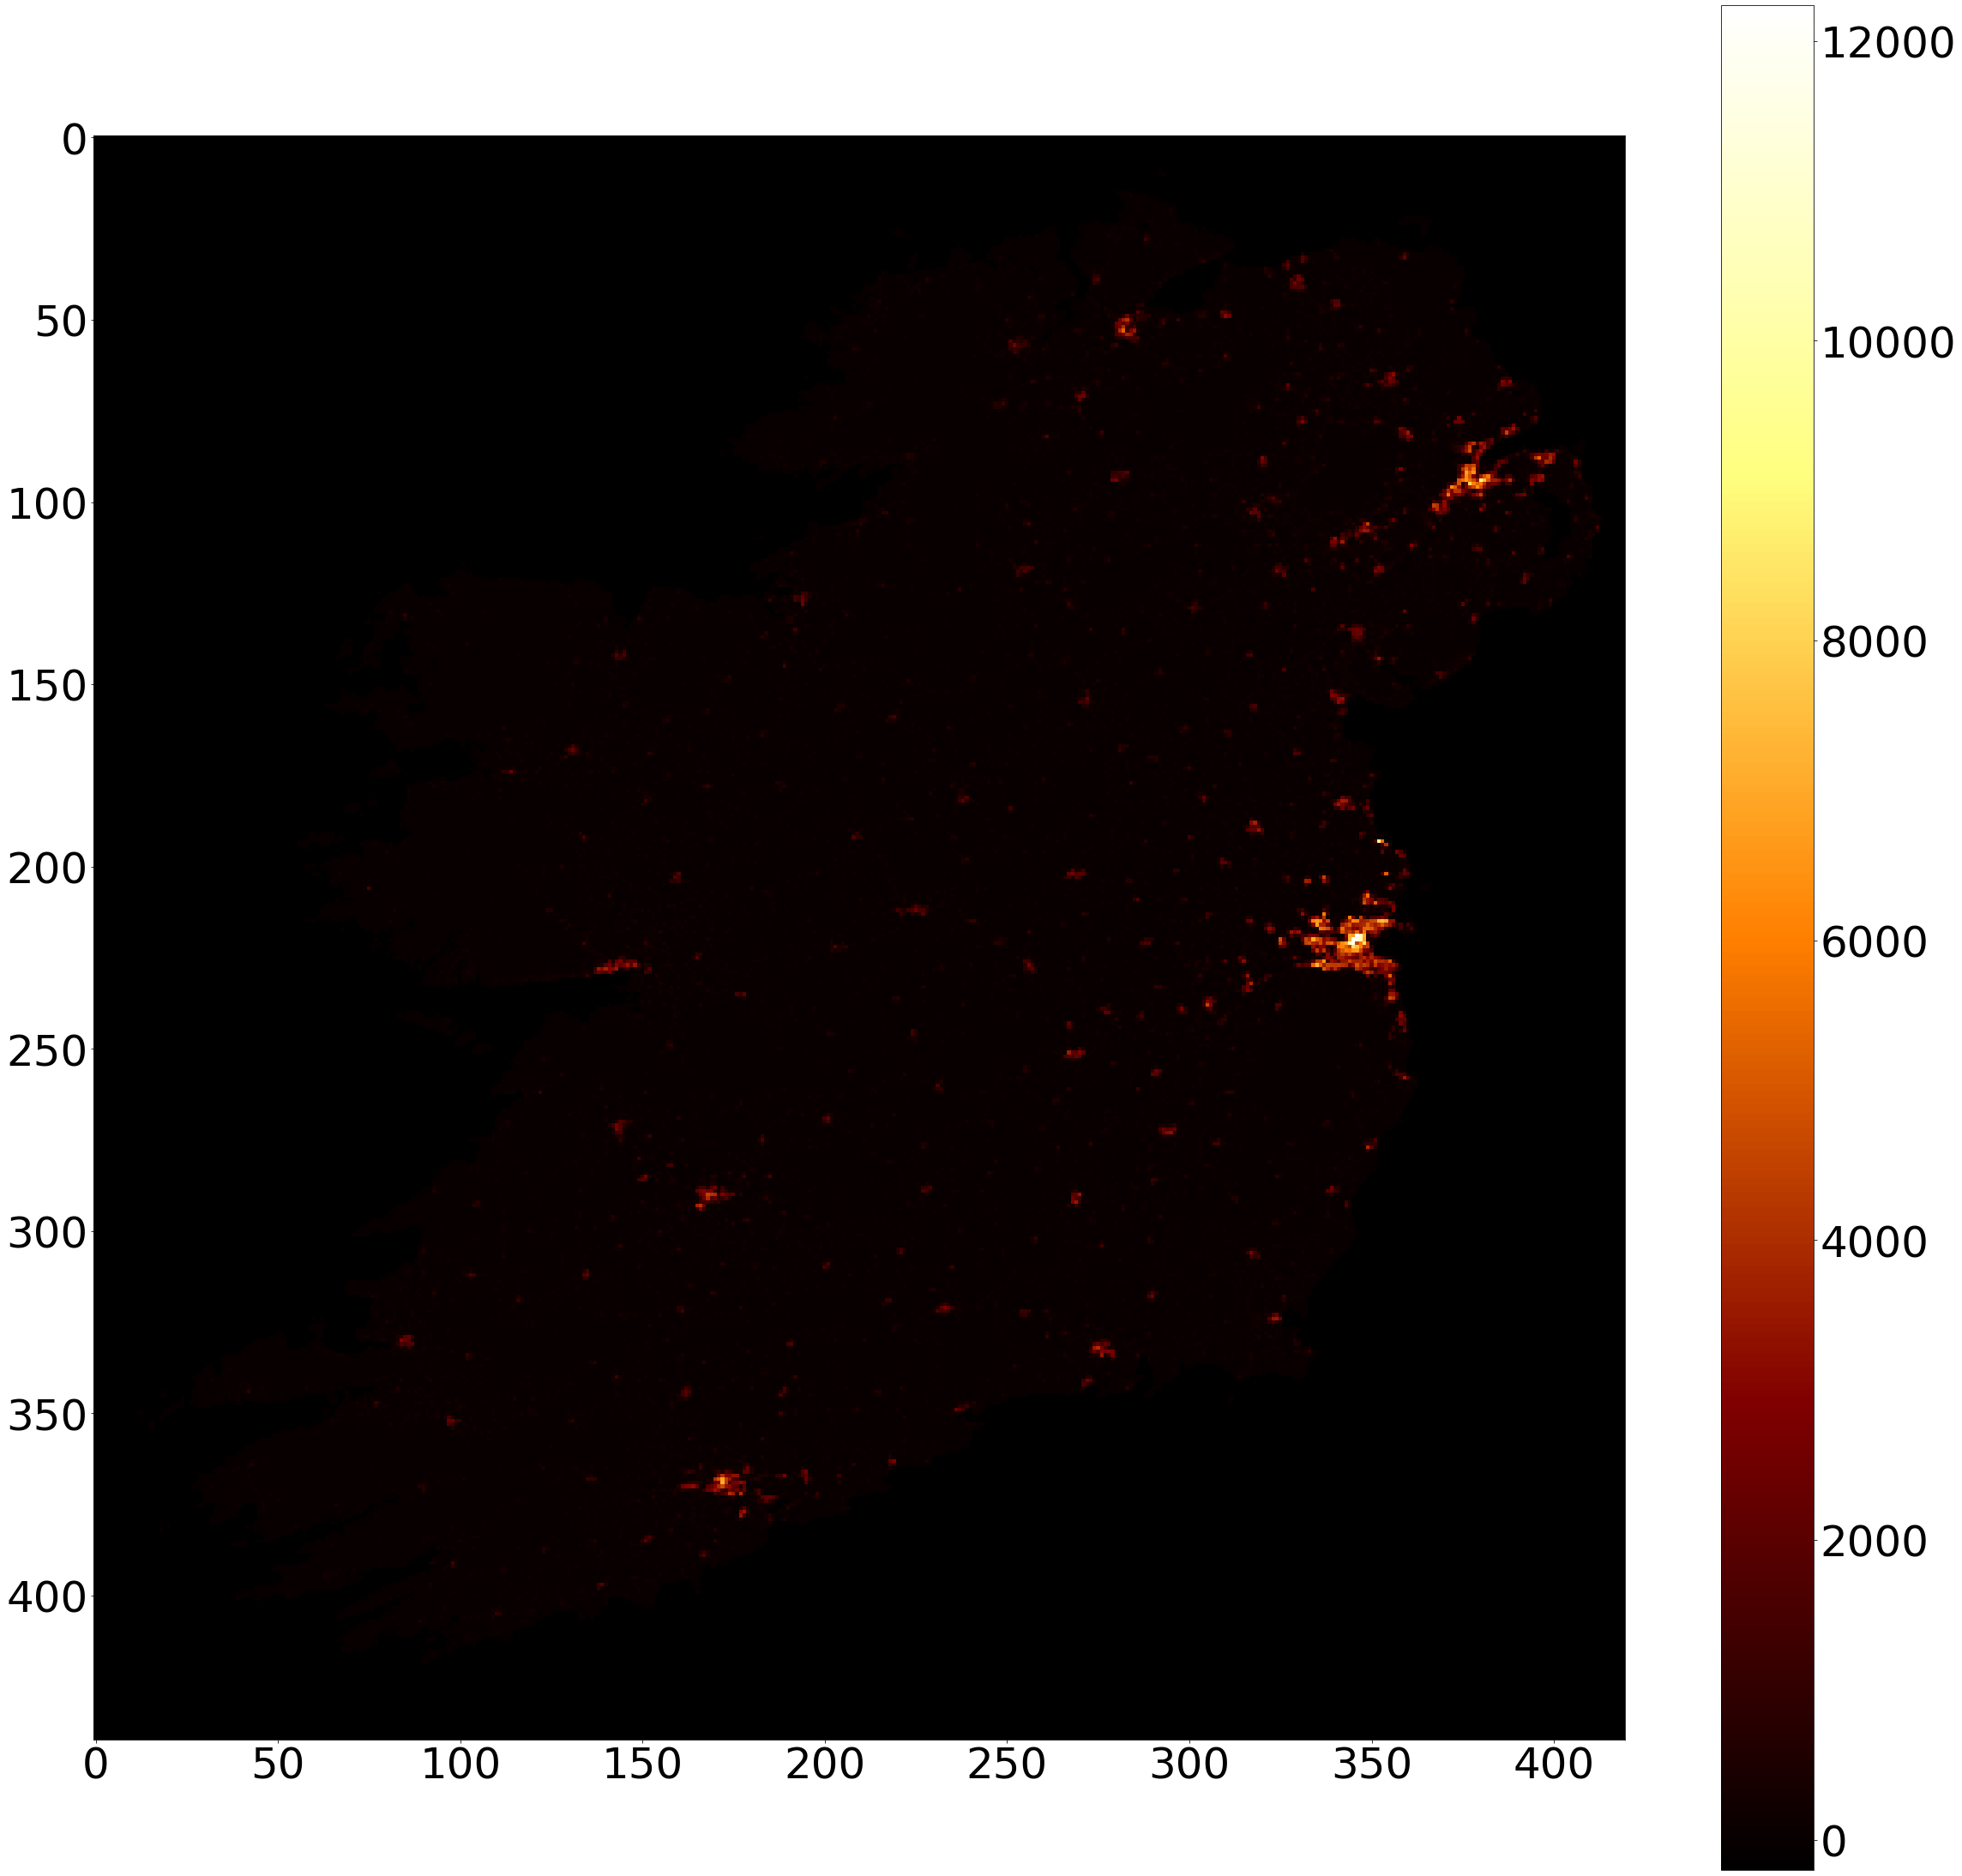

In [11]:
fig, ax = plt.subplots( figsize=(40, 40))
plot=ax.imshow(vals, cmap="afmhot")
fig.colorbar(plot)

In [12]:
test=np.where(vals<0, 0, vals)
test.sum()

6551319.200469393

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in sqrt
  after removing the cwd from sys.path.


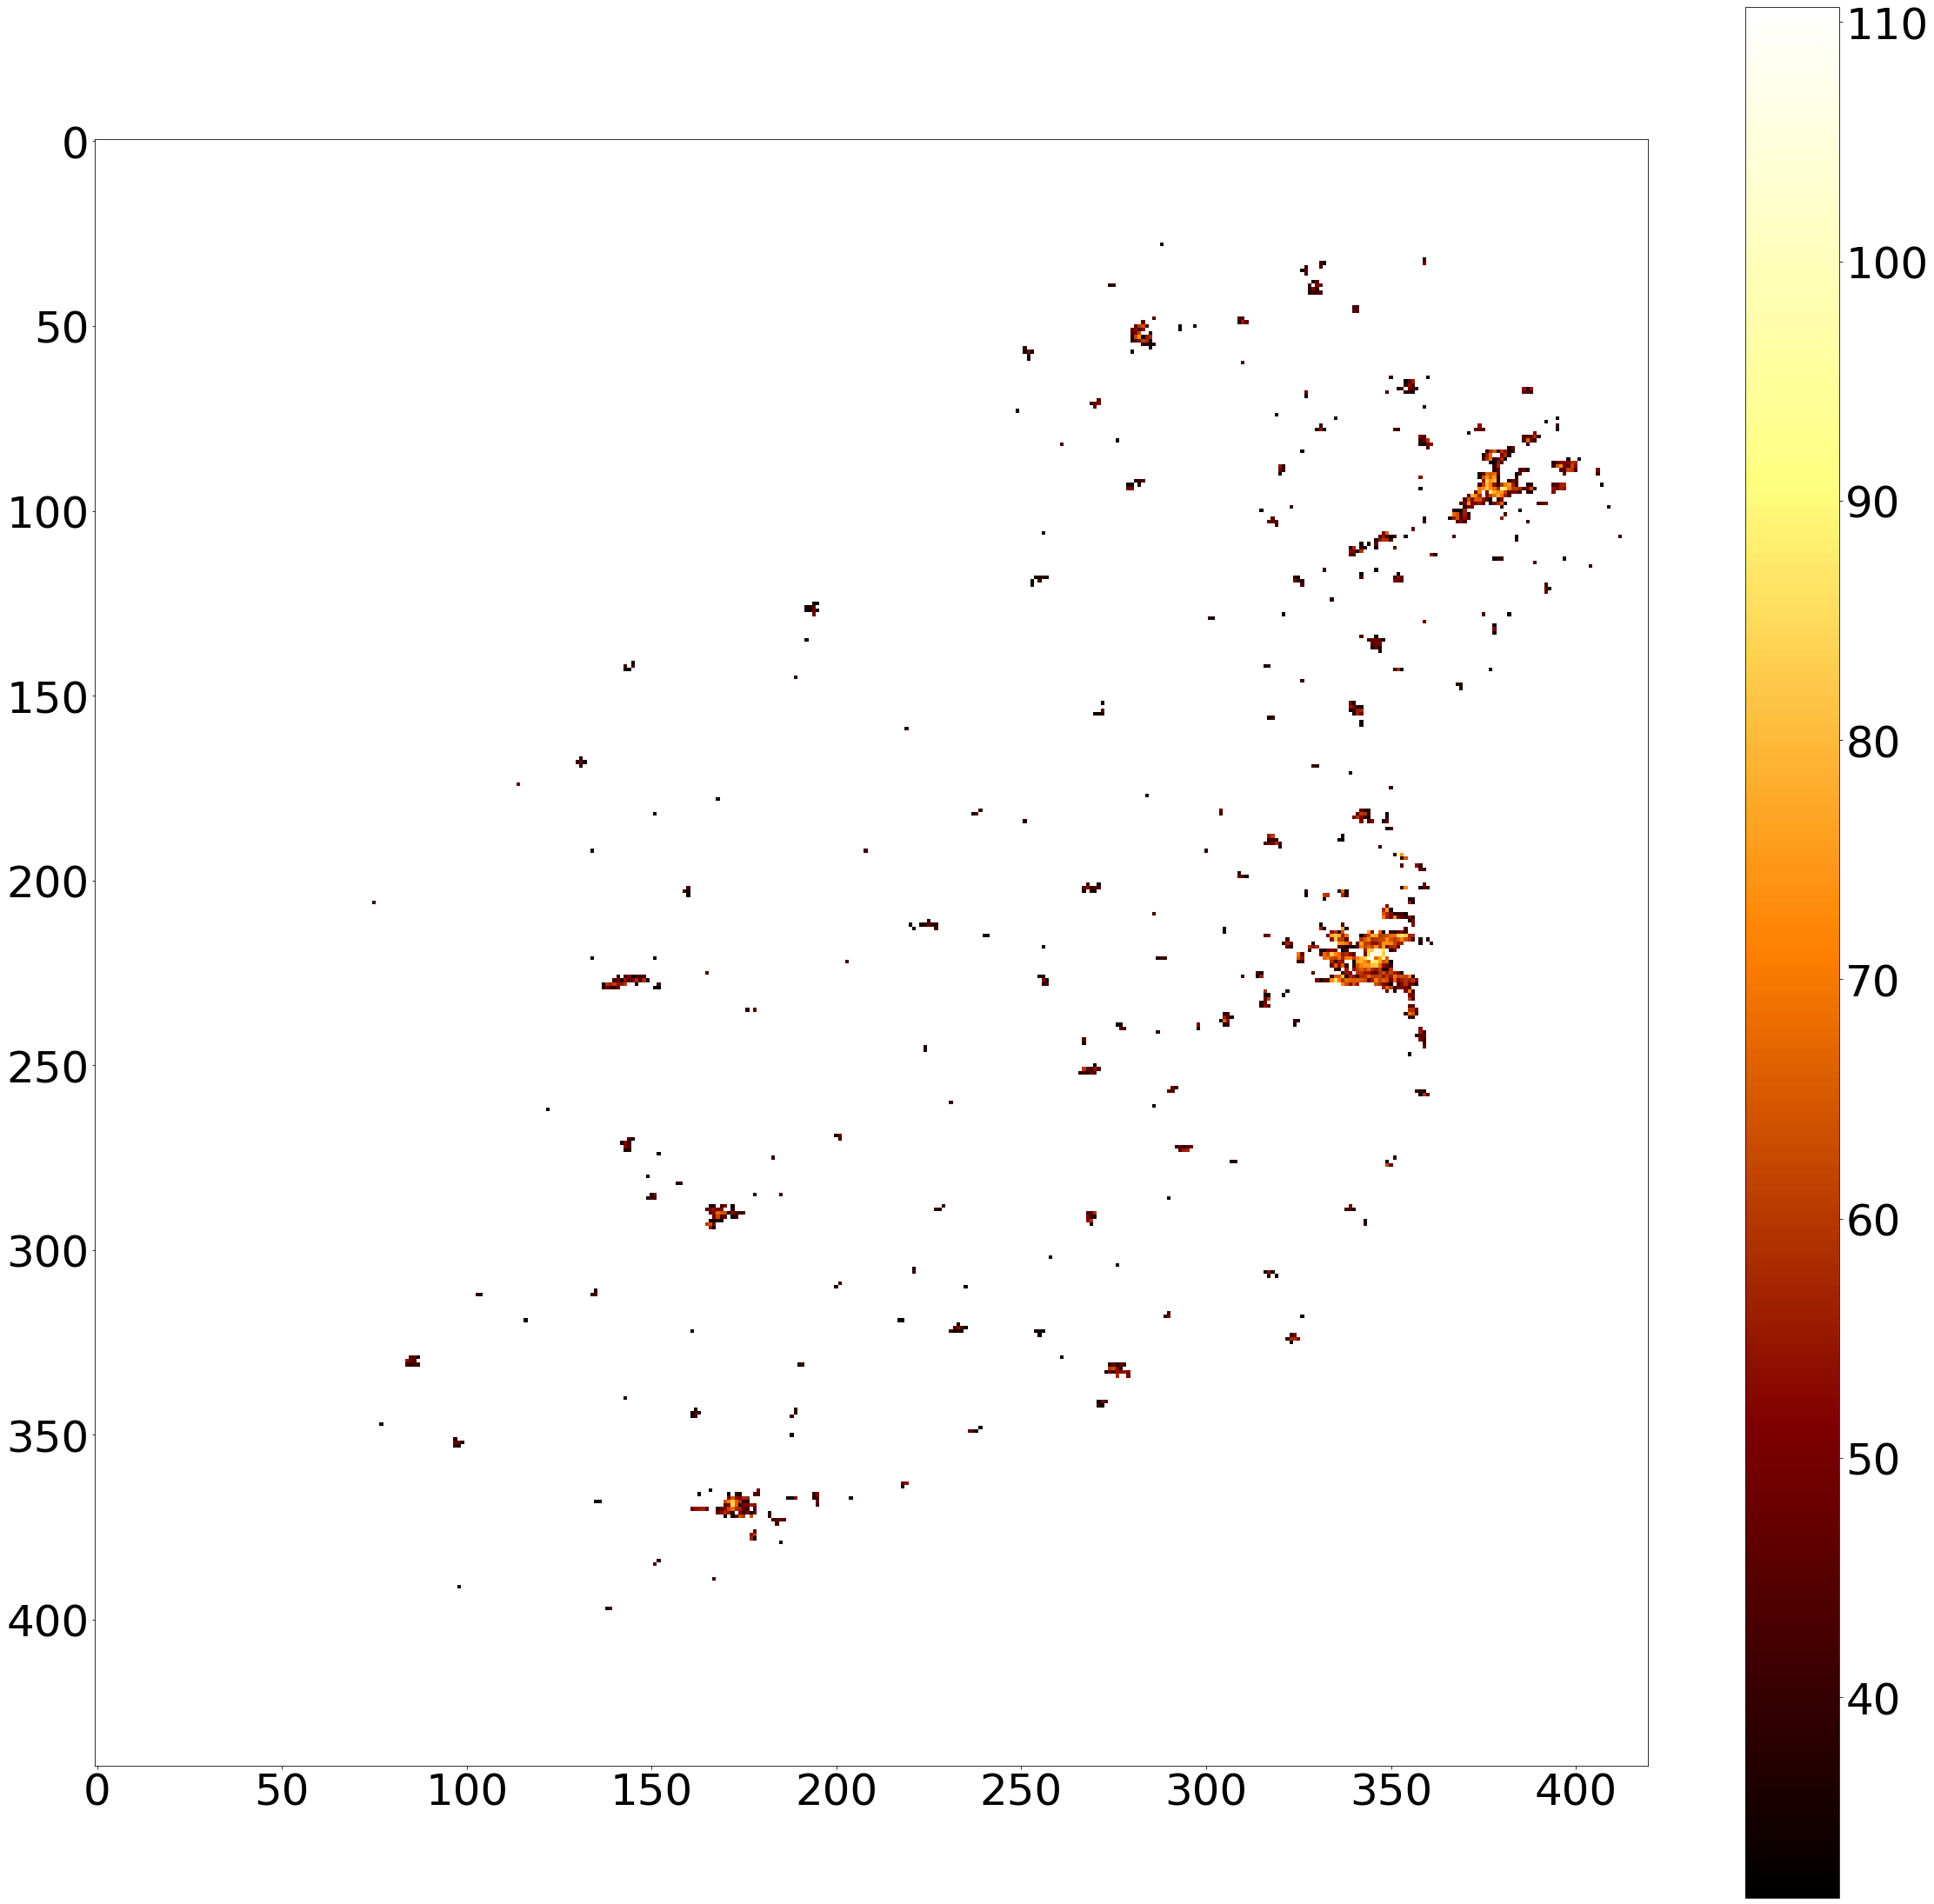

In [13]:
test=np.where((vals < 1000), np.where(vals>-200, -1, vals), vals)
test=np.array(test)
fig, ax = plt.subplots( figsize=(40, 40))
plot=ax.imshow(test**0.5, cmap="afmhot")
fig.colorbar(plot)

In [14]:
#desampling first is actually probably better here

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in sqrt
  


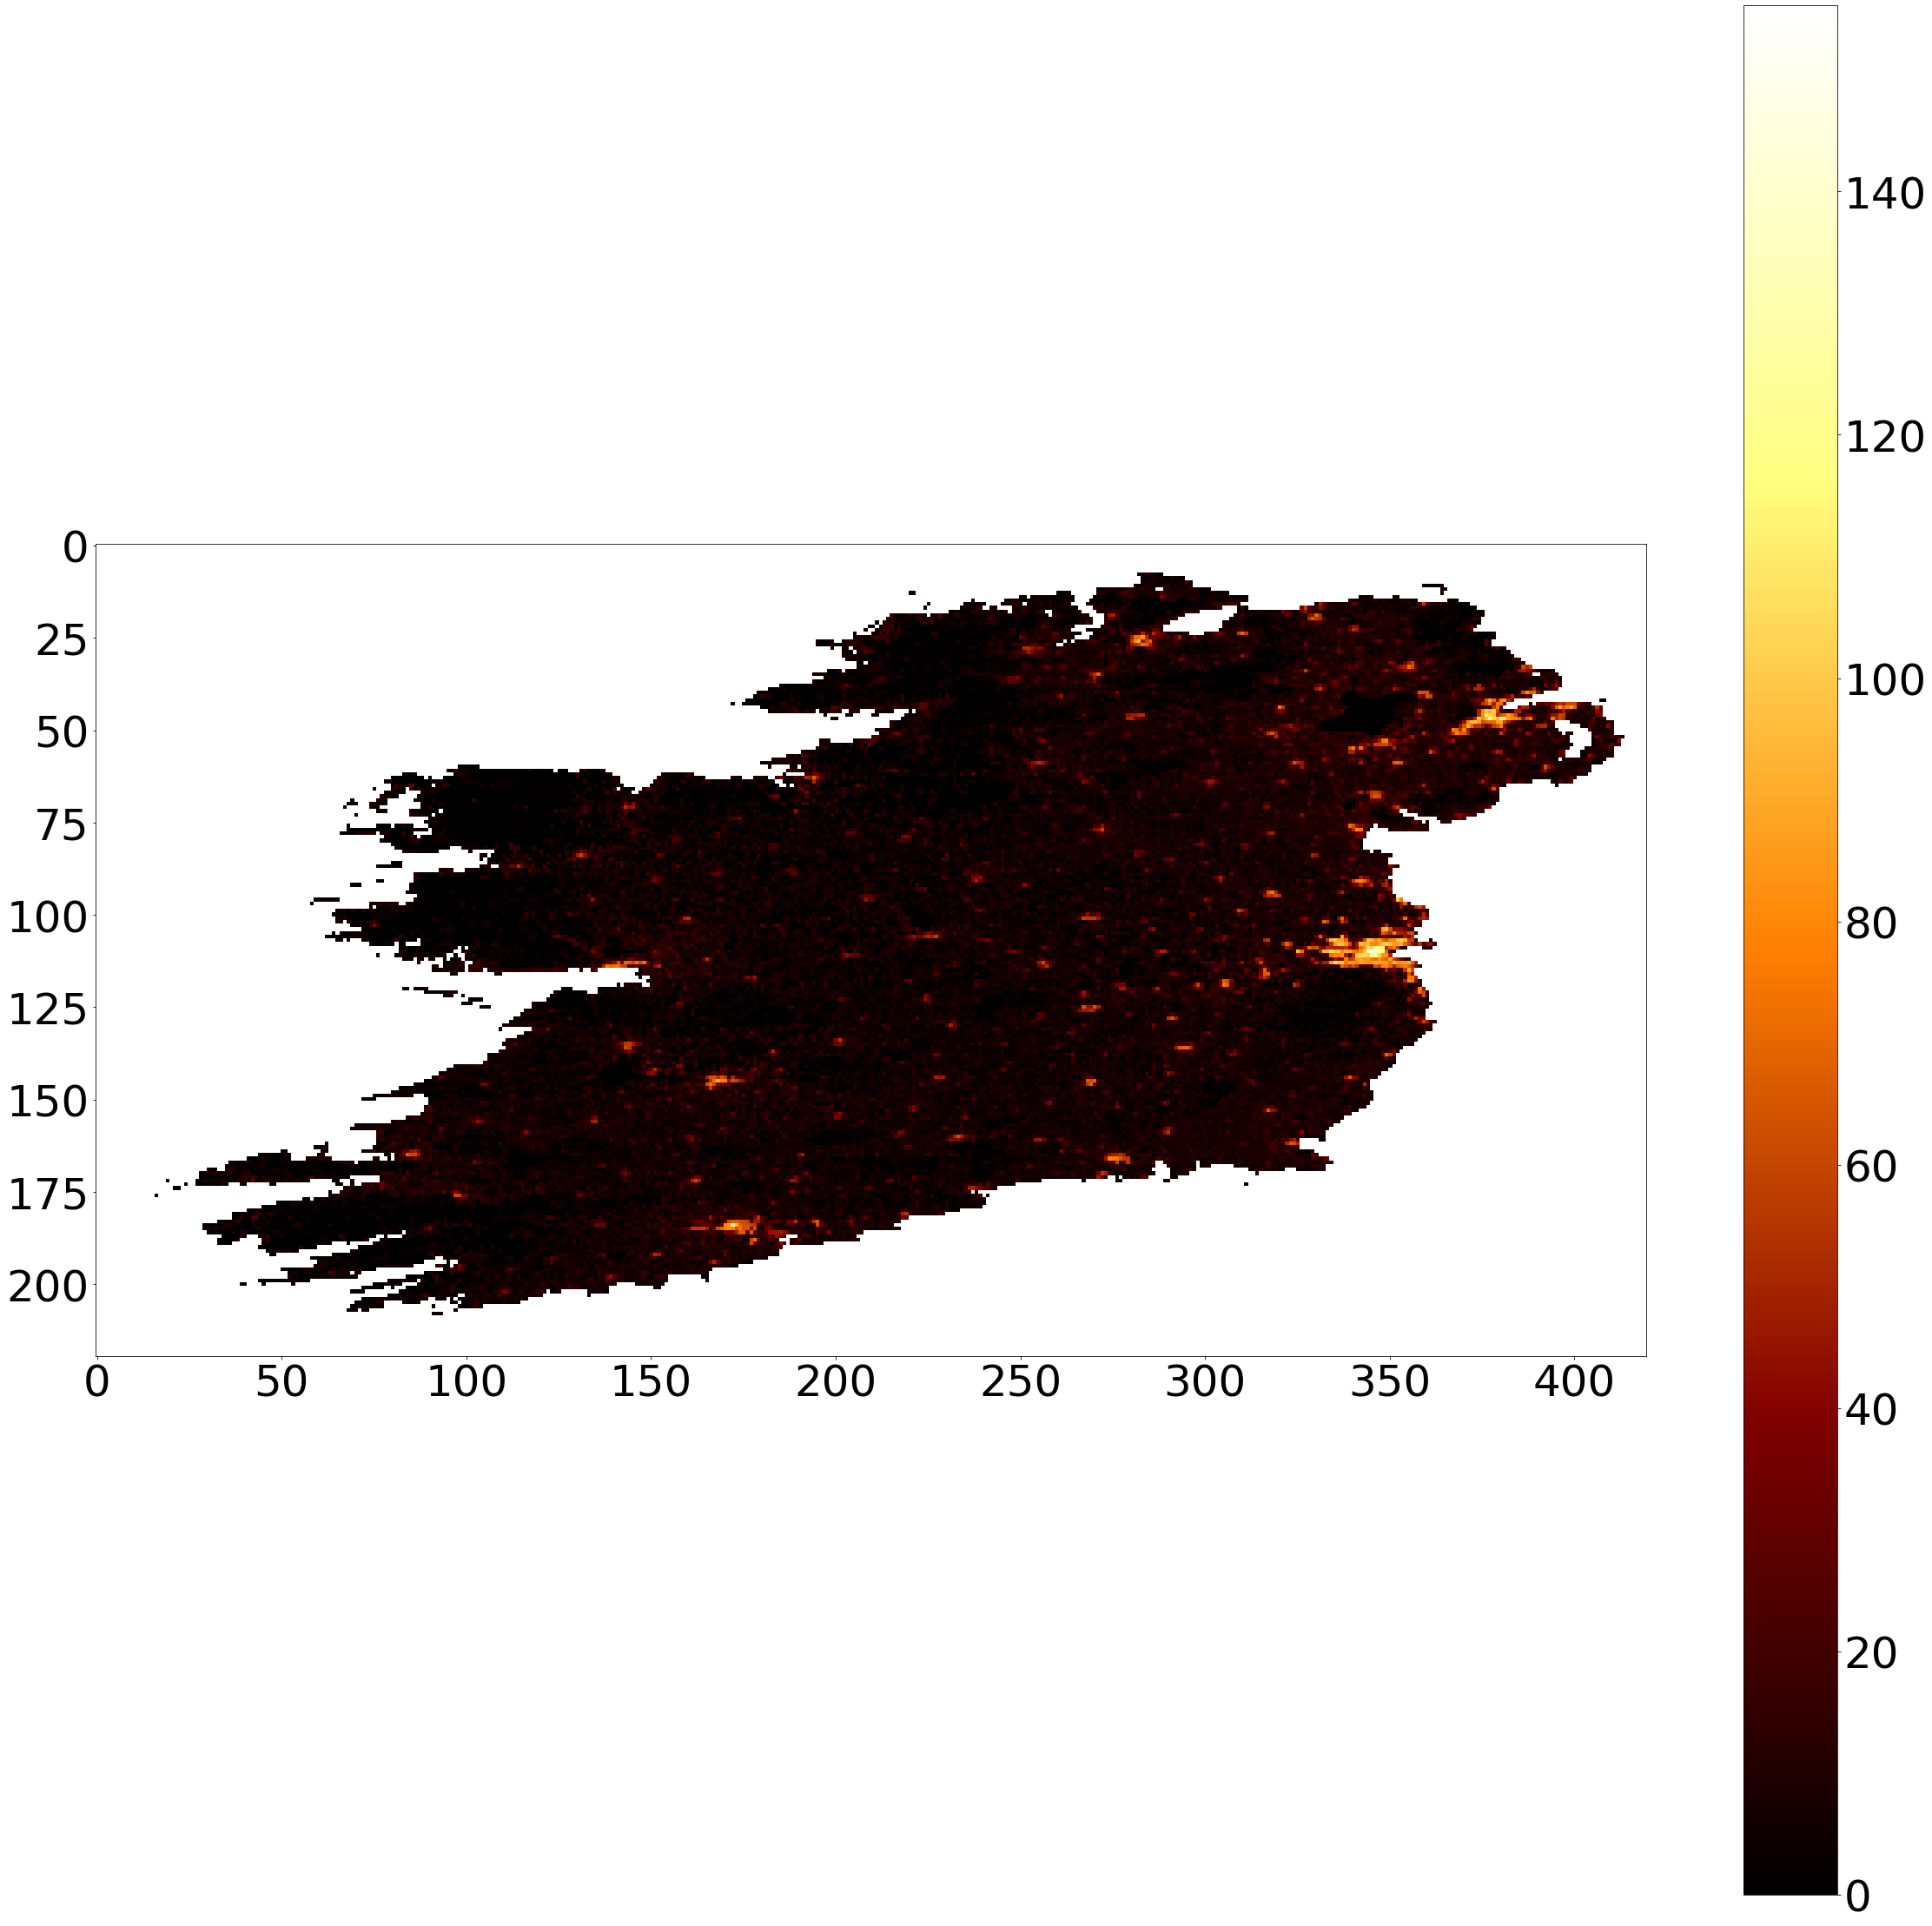

In [15]:
re=[]
for i in range(int(len(vals)/2)):
    row1, row2=vals[2*i], vals[2*i+1]
    row=np.array(row1)+np.array(row2)
    re.append(row)
re=np.array(re)
fig, ax = plt.subplots( figsize=(40, 40))
plot=ax.imshow(re**0.5, cmap="afmhot")
fig.colorbar(plot)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in sqrt
  


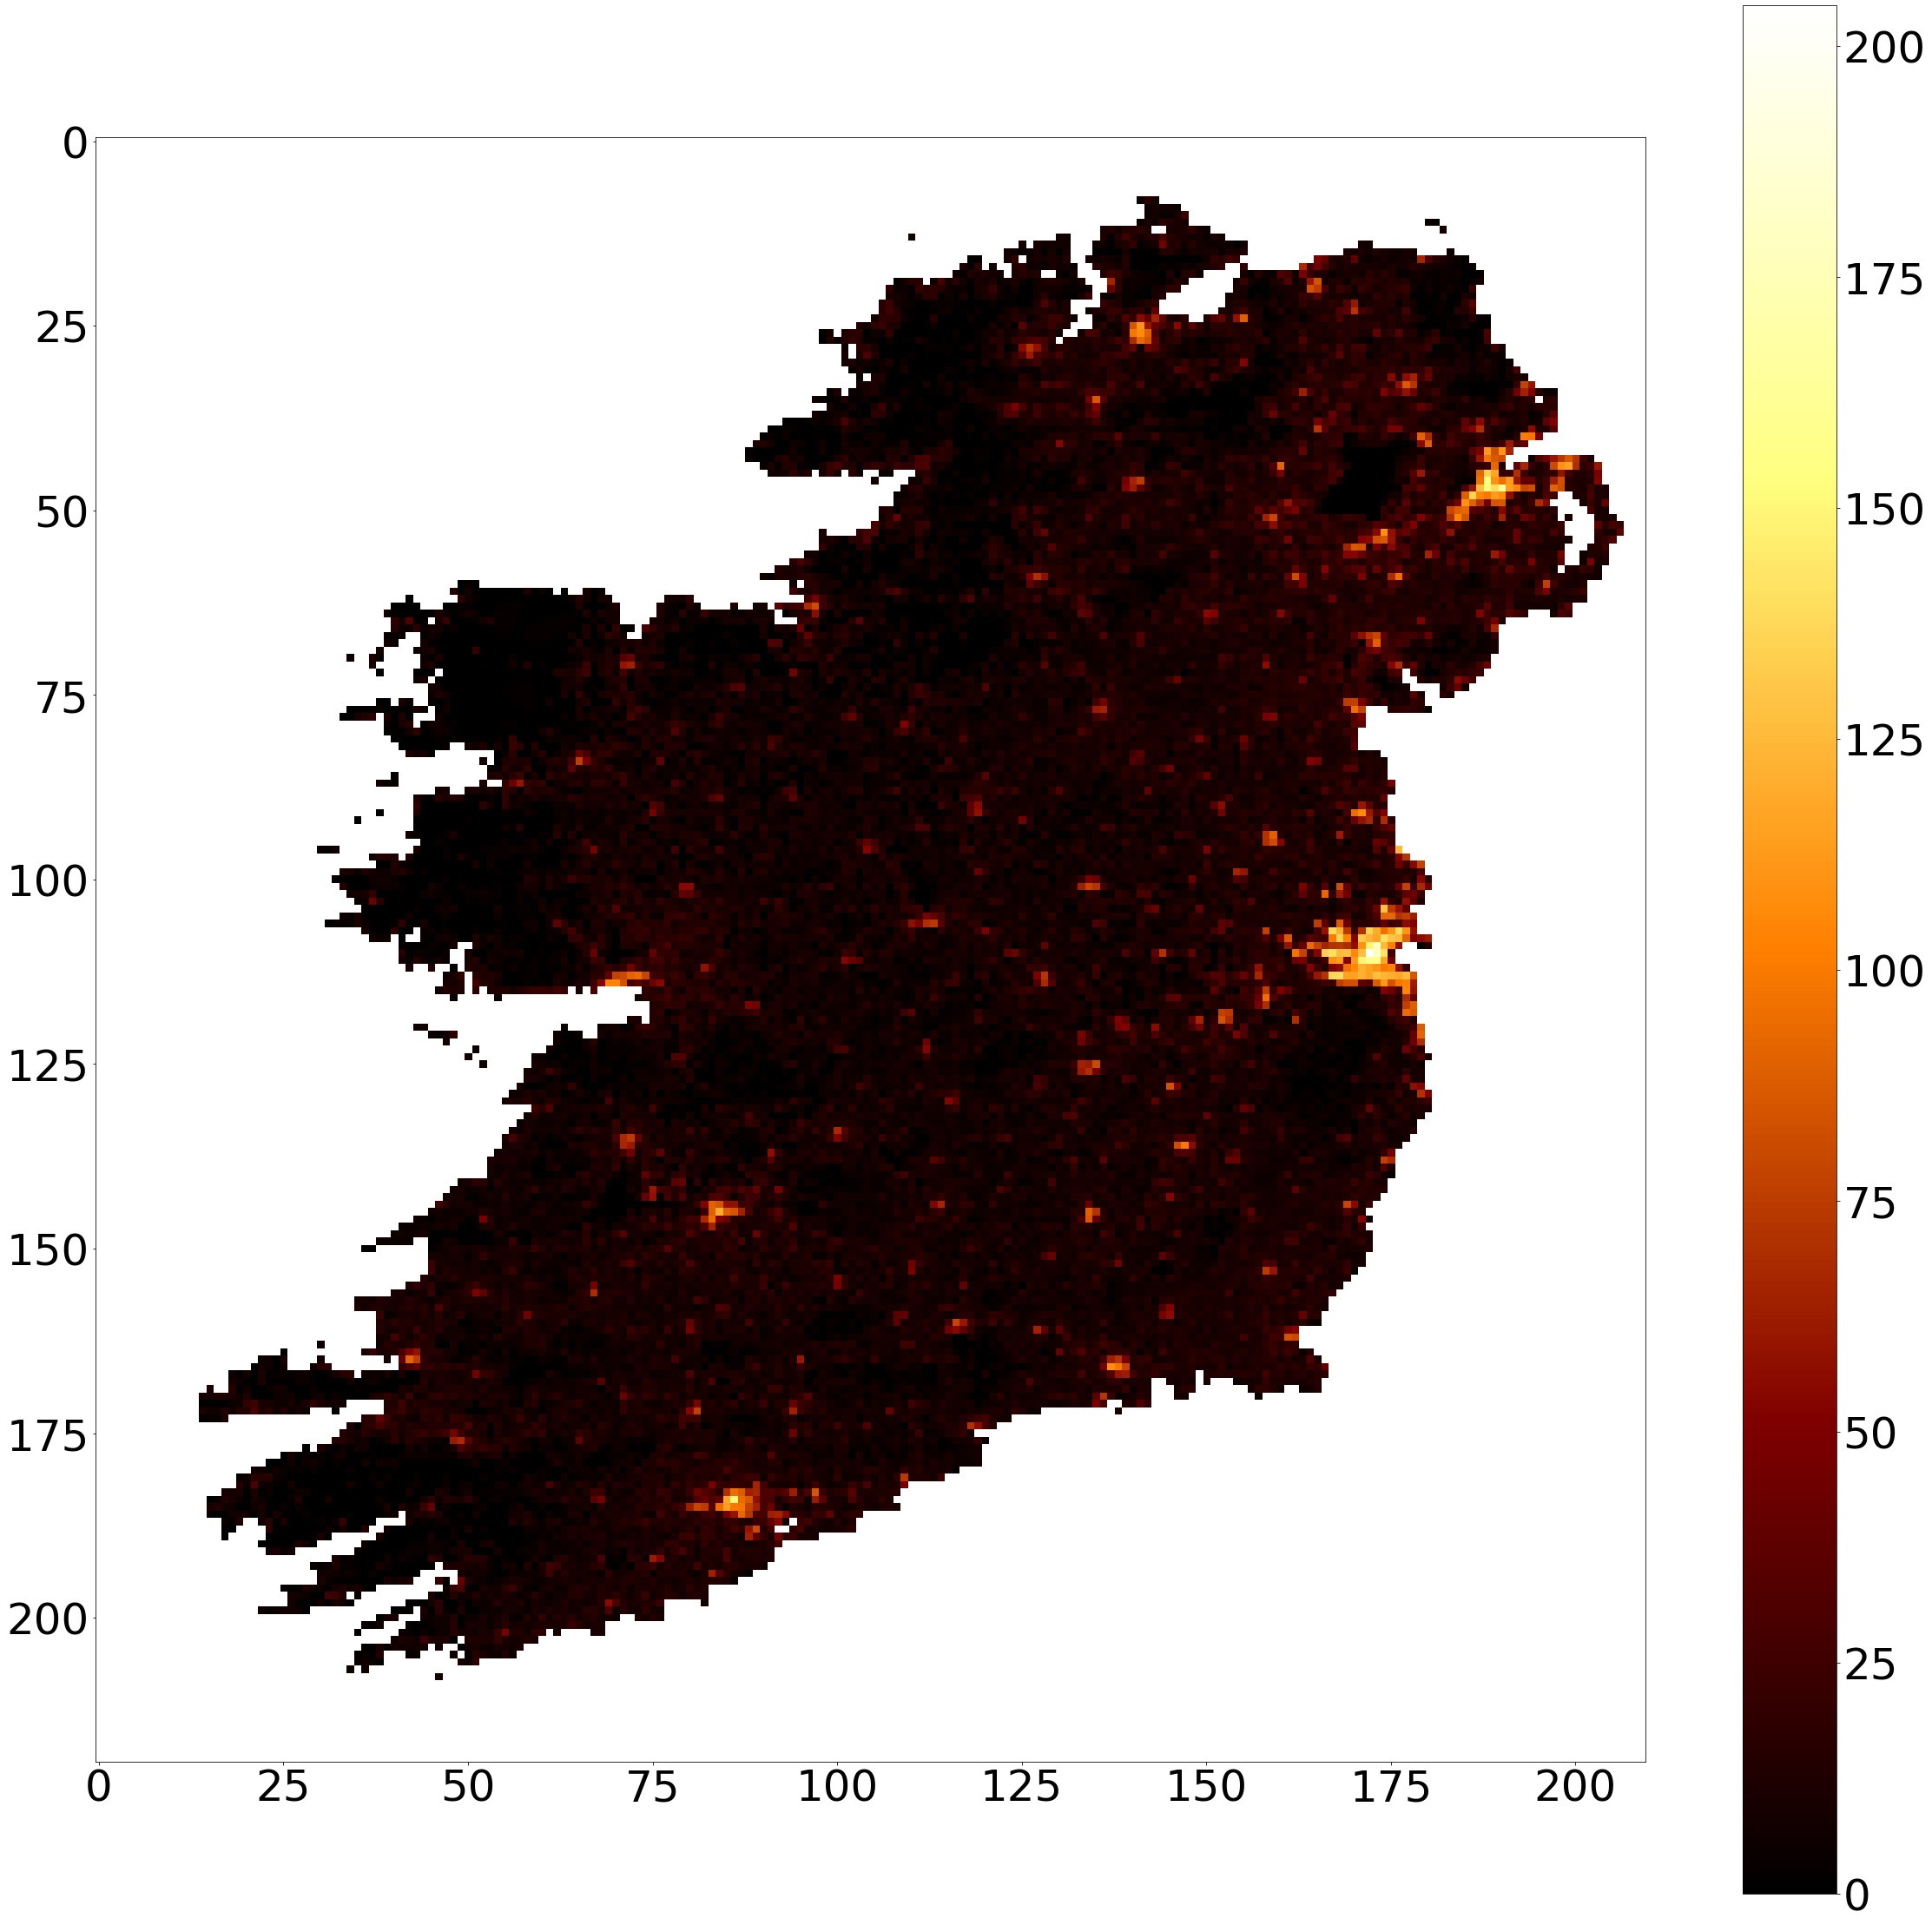

In [16]:
tdf=pd.DataFrame(re)
tdf=tdf.T
tdfvals=tdf.values
re=[]
for i in range(int(len(tdfvals)/2)):
    row1, row2=tdfvals[2*i], tdfvals[2*i+1]
    row=np.array(row1)+np.array(row2)
    re.append(row)
re=np.array(re)
tdf=pd.DataFrame(re)
tdf=tdf.T
re=tdf.values
fig, ax = plt.subplots( figsize=(40, 40))
plot=ax.imshow(re**0.5, cmap="afmhot")
fig.colorbar(plot)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in sqrt
  after removing the cwd from sys.path.


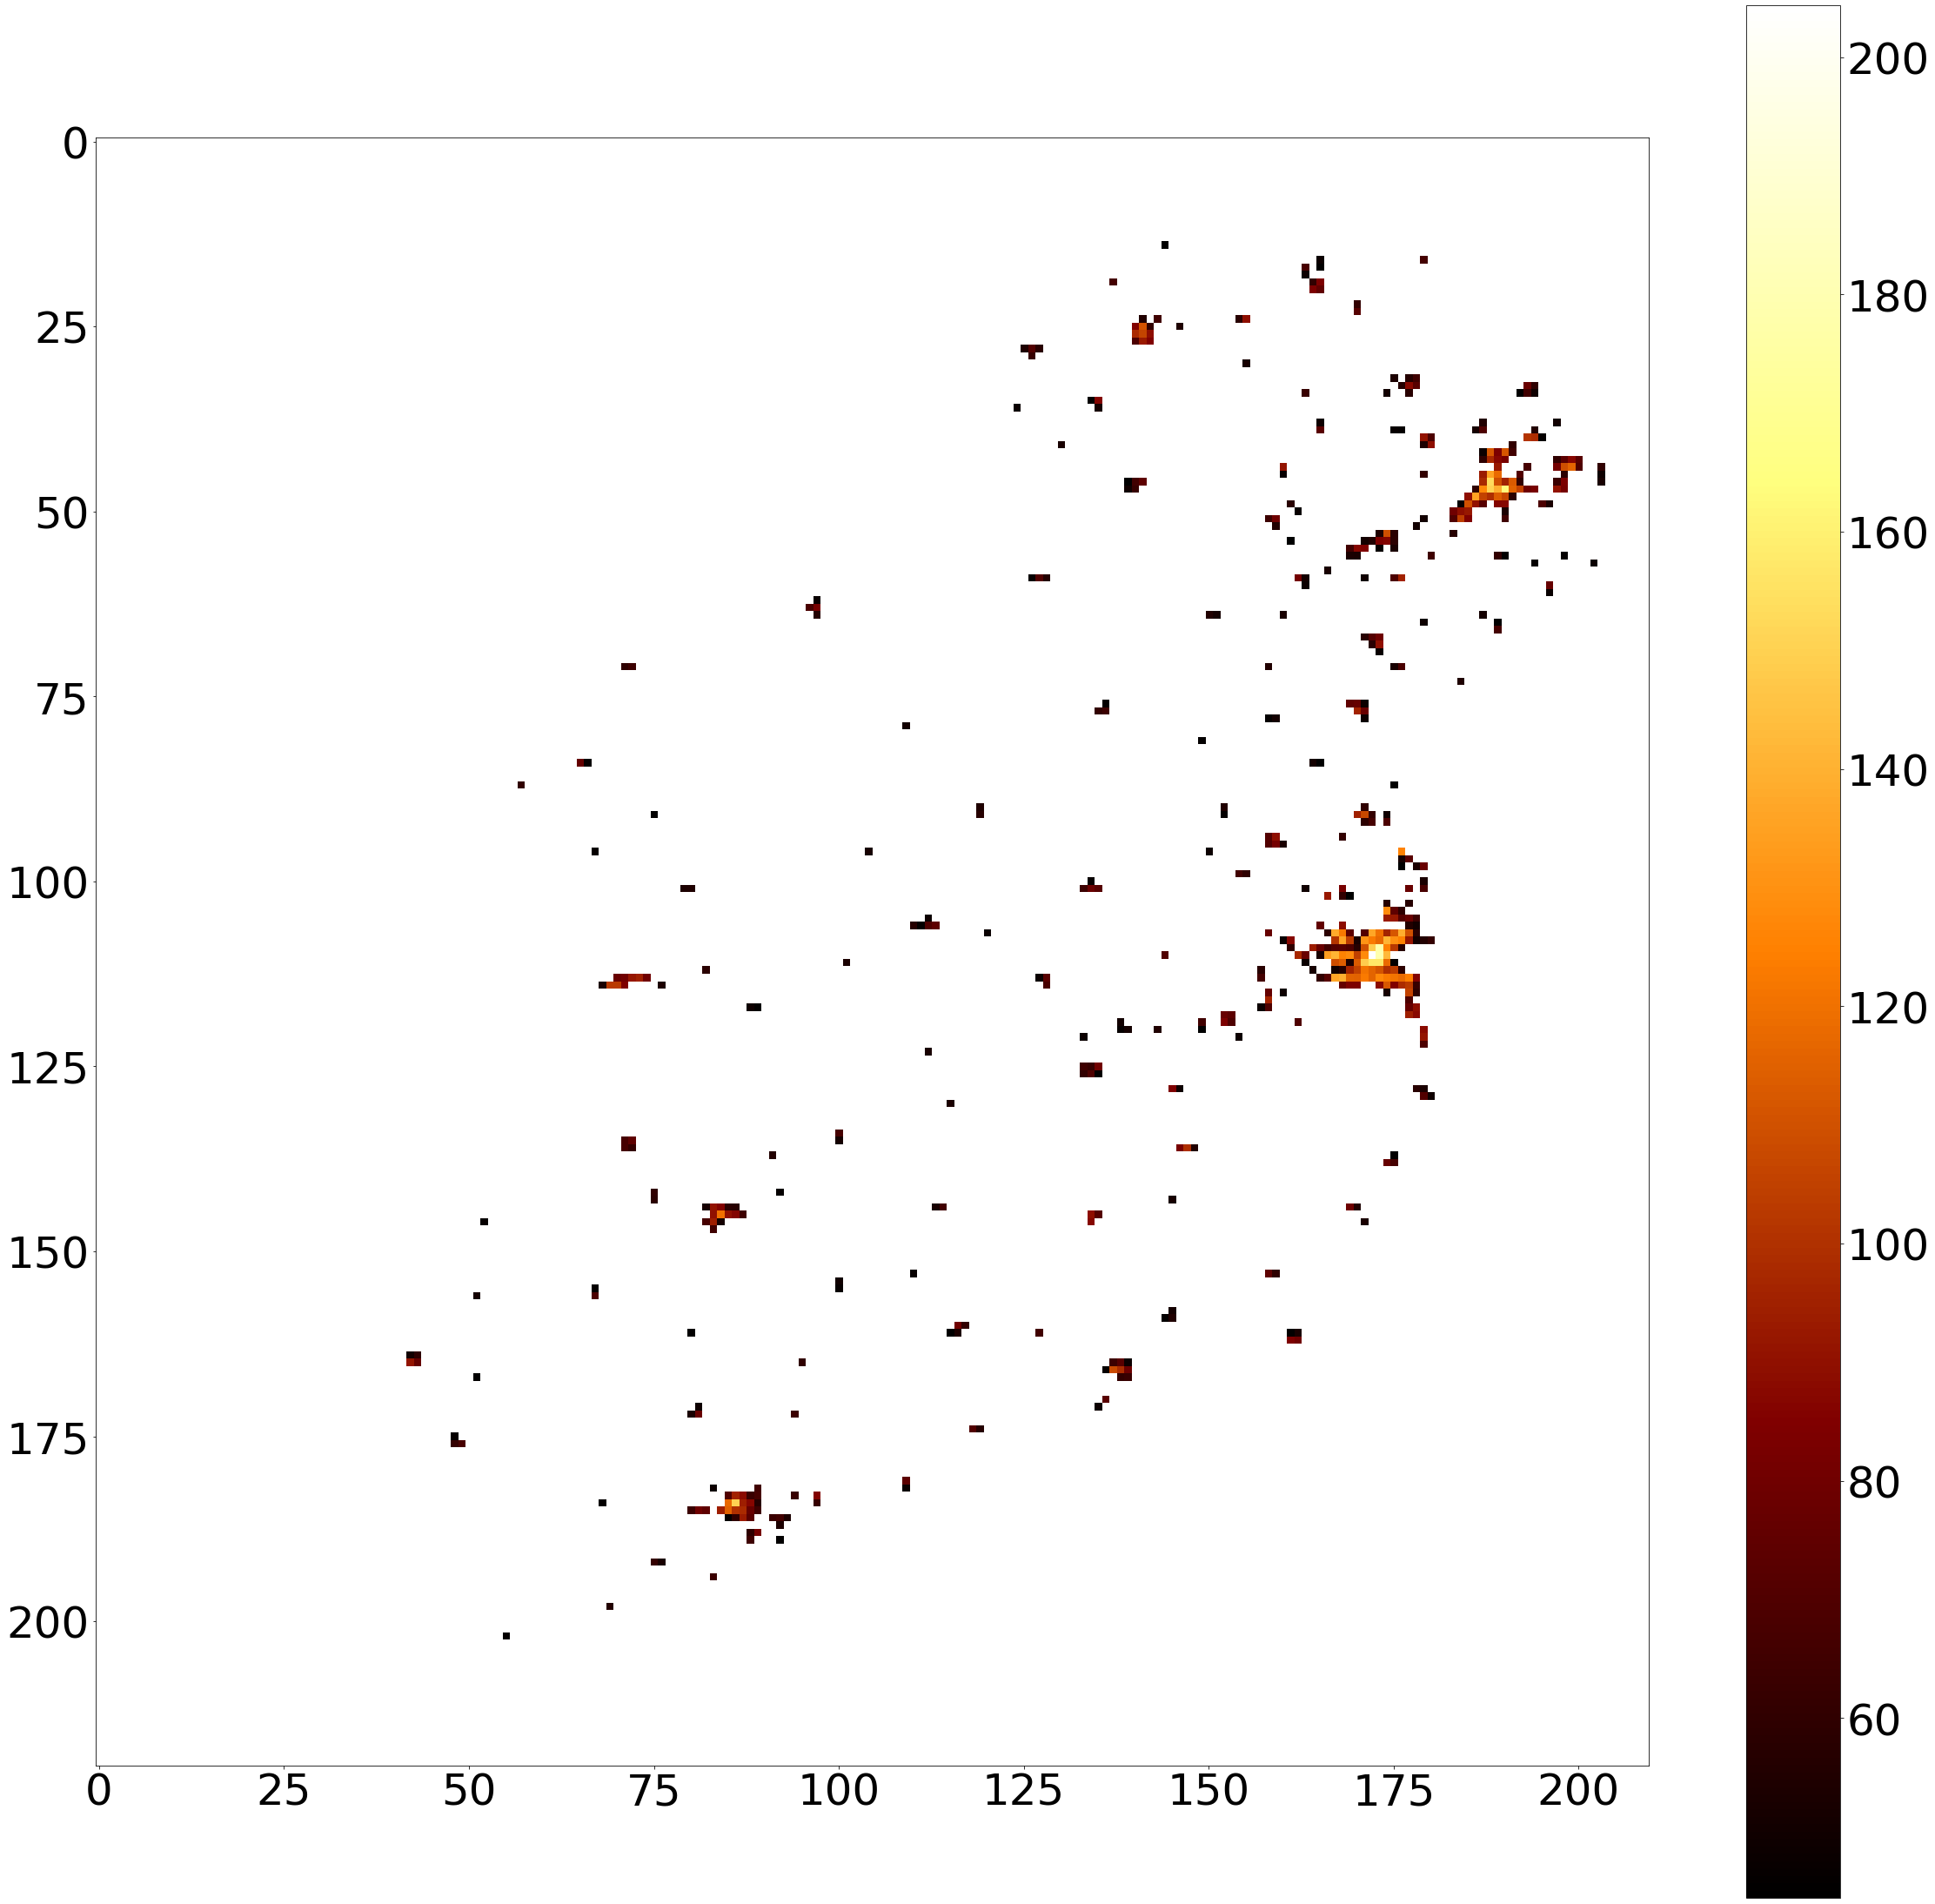

In [17]:
test=np.where((tdf < 2000), np.where(tdf>-200, -1, tdf), tdf)
test=np.array(test)
fig, ax = plt.subplots( figsize=(40, 40))
plot=ax.imshow(test**0.5, cmap="afmhot")
fig.colorbar(plot)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in sqrt
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in sqrt


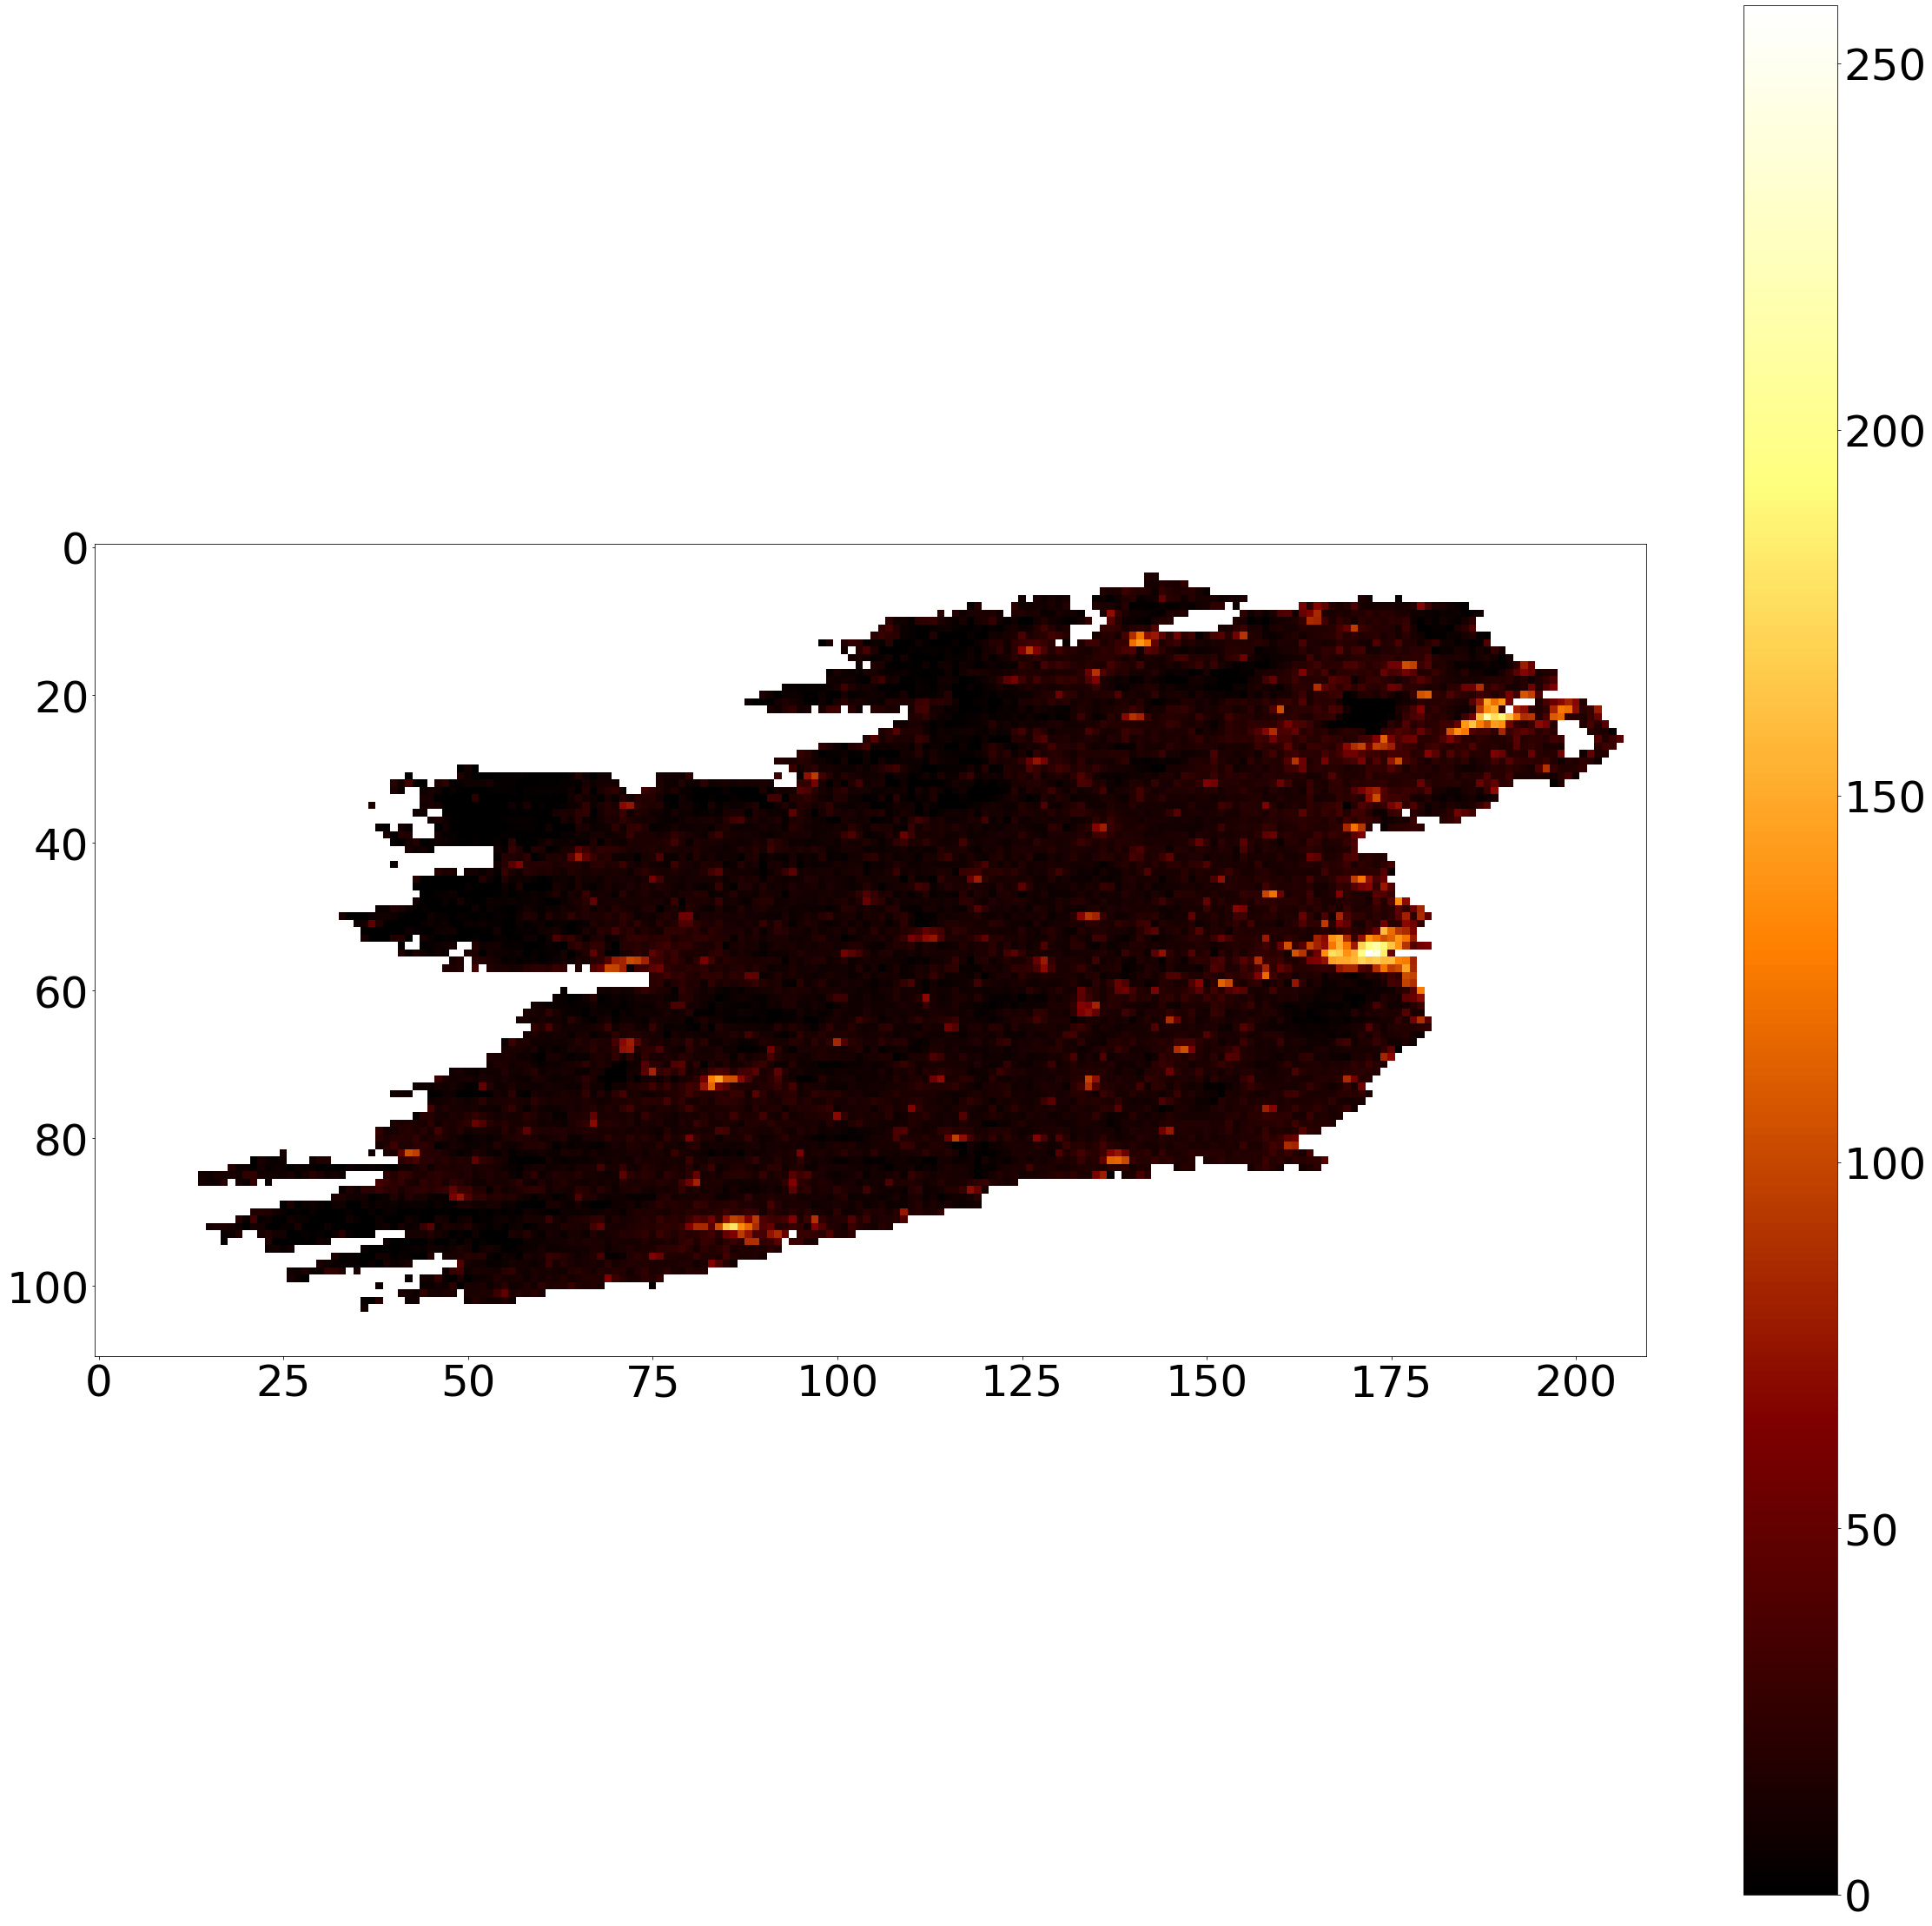

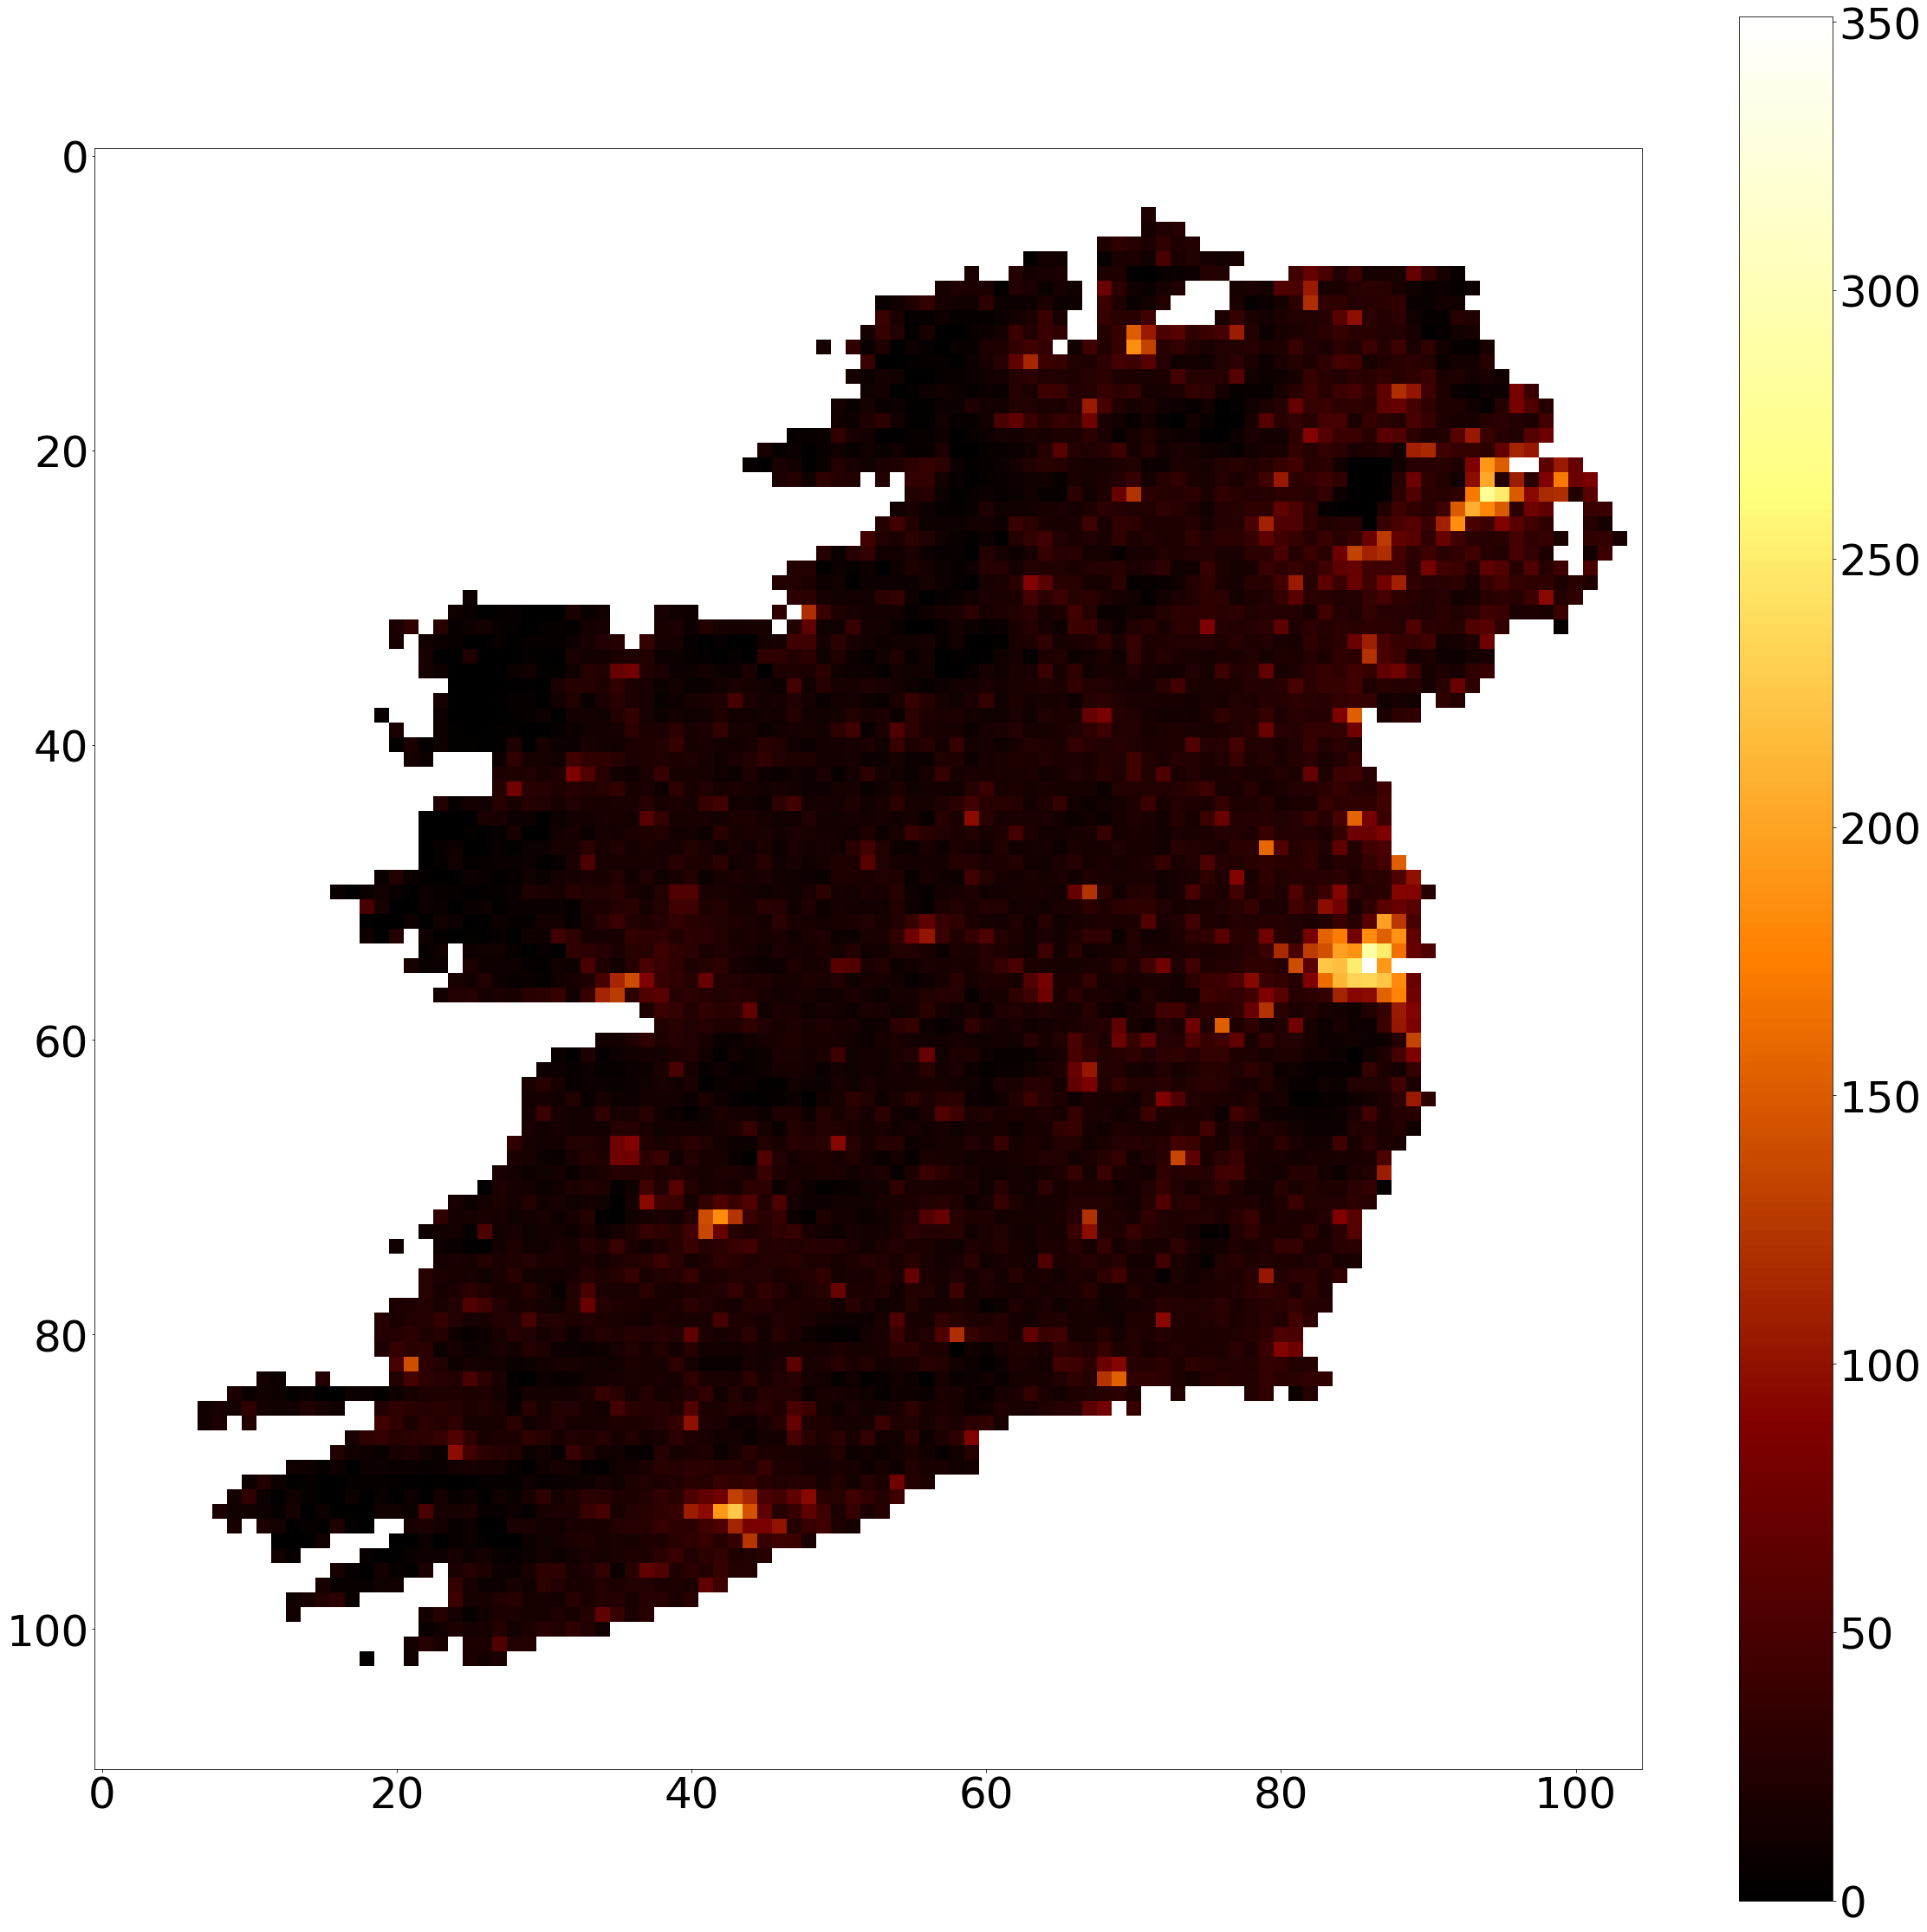

In [18]:
vals=re
re=[]
for i in range(int(len(vals)/2)):
    row1, row2=vals[2*i], vals[2*i+1]
    row=np.array(row1)+np.array(row2)
    re.append(row)
re=np.array(re)
fig, ax = plt.subplots( figsize=(40, 40))
plot=ax.imshow(re**0.5, cmap="afmhot")
fig.colorbar(plot)
            
tdf=pd.DataFrame(re)
tdf=tdf.T
tdfvals=tdf.values
re=[]
for i in range(int(len(tdfvals)/2)):
    row1, row2=tdfvals[2*i], tdfvals[2*i+1]
    row=np.array(row1)+np.array(row2)
    re.append(row)
             
re=np.array(re)

tdf=pd.DataFrame(re)
tdf=tdf.T
re=tdf.values
fig, ax = plt.subplots( figsize=(40, 40))
plot=ax.imshow(re**0.5, cmap="afmhot")
fig.colorbar(plot)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in sqrt
  after removing the cwd from sys.path.


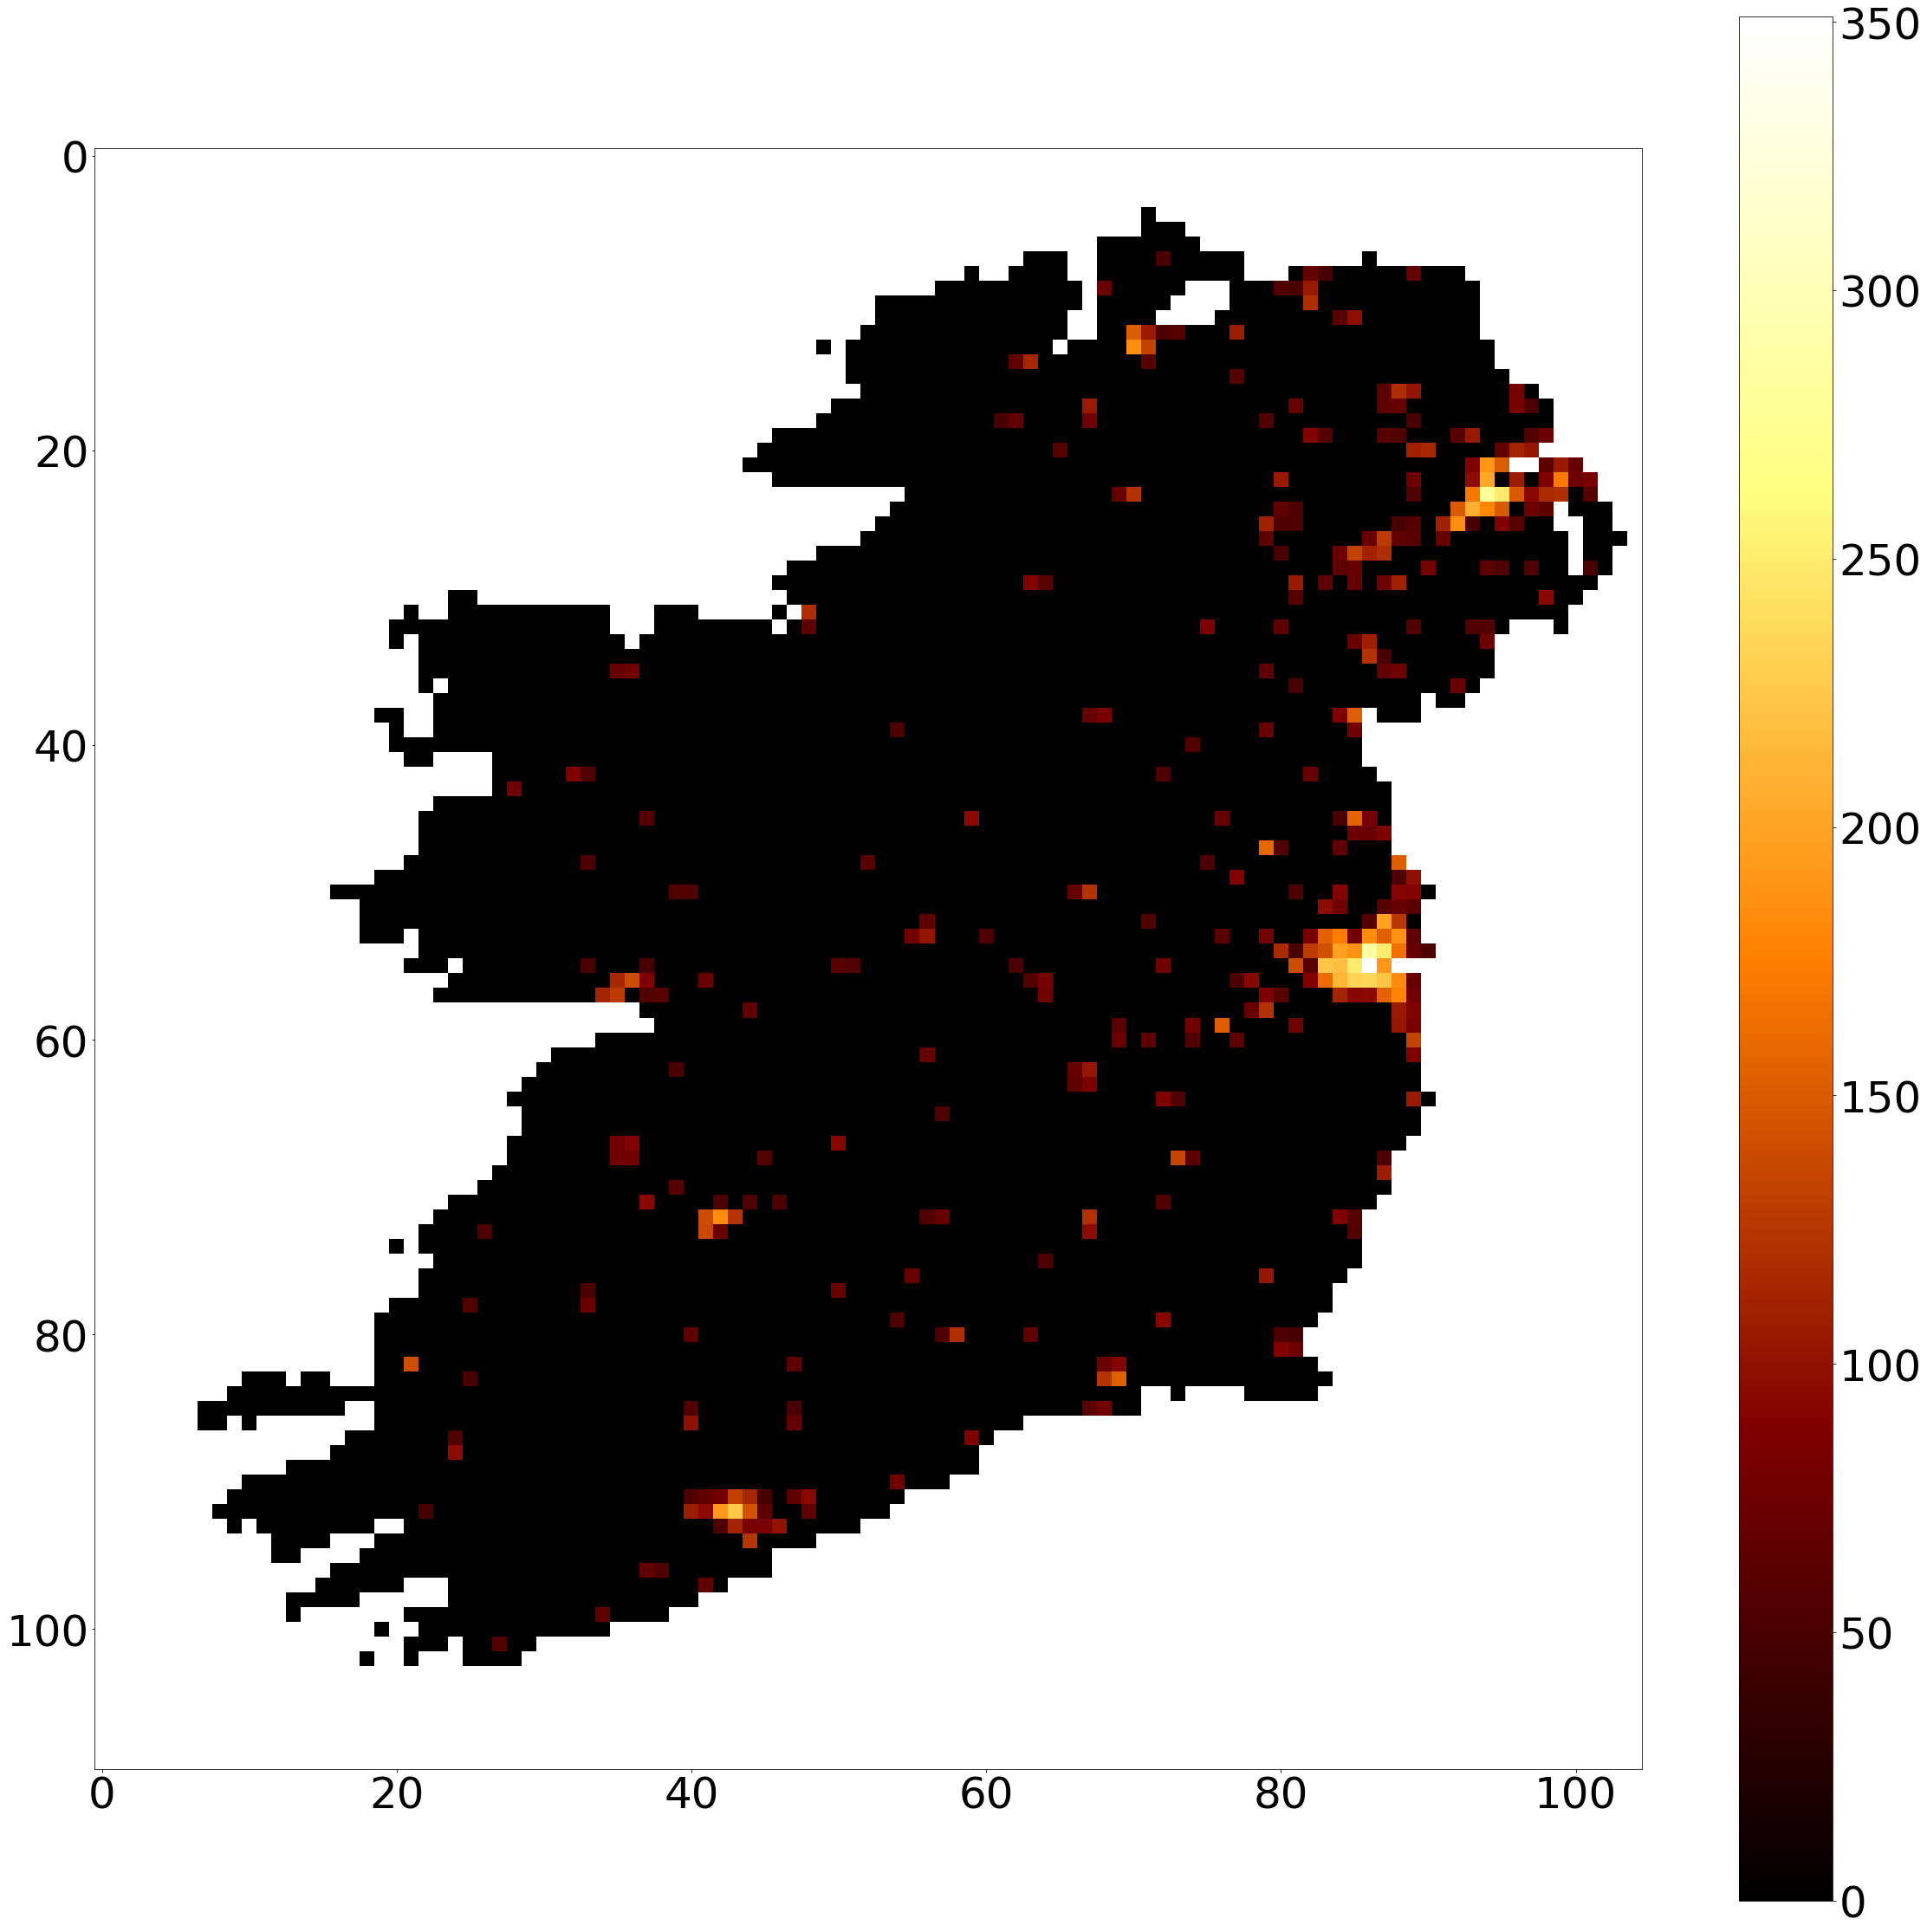

In [19]:
test=np.where((tdf < 2500), np.where(tdf>-200, 0, tdf), tdf)
test=np.array(test)
fig, ax = plt.subplots( figsize=(40, 40))
plot=ax.imshow(test**0.5, cmap="afmhot")
fig.colorbar(plot)

In [20]:
test=pd.DataFrame(test)
test.to_csv(r'O:\Desktop\WORLDMAP\IRLMAP_QUARTERRES_CUTOFF.csv', sep=',', index=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until


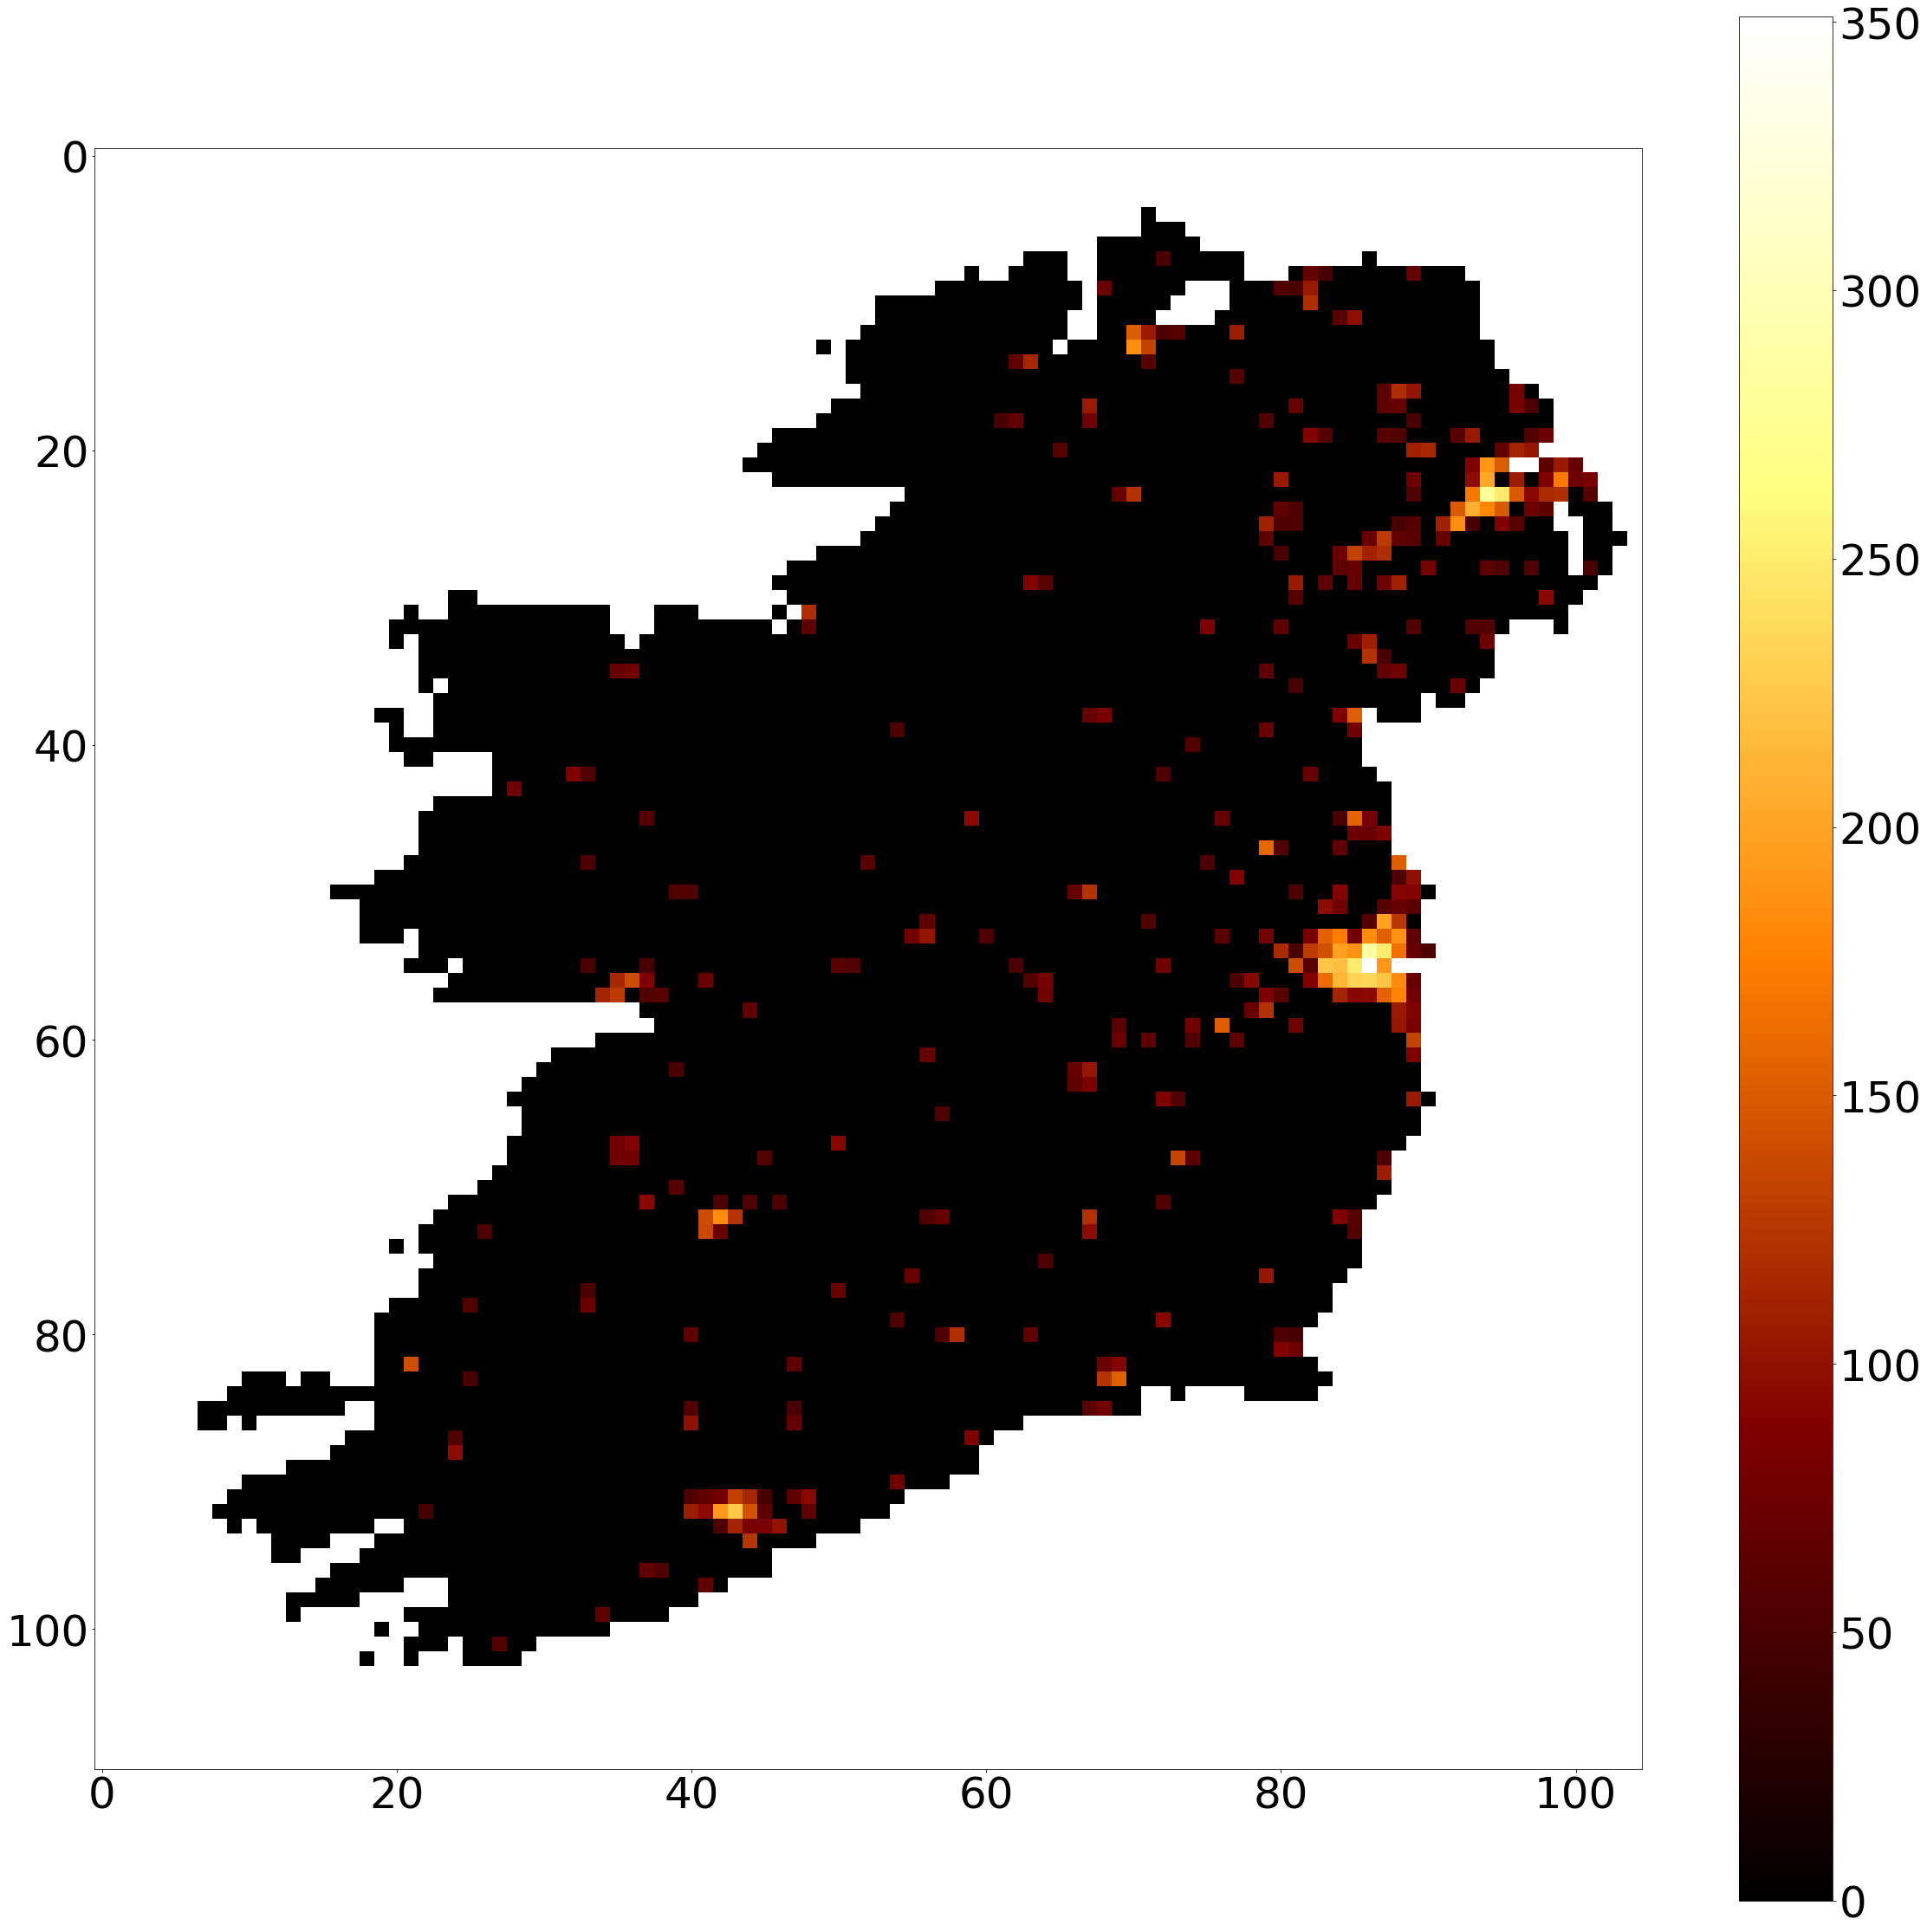

In [21]:
ndf=pd.read_csv(r'O:\Desktop\WORLDMAP\IRLMAP_QUARTERRES_CUTOFF.csv', index_col=0)
fig, ax = plt.subplots( figsize=(40, 40))
plot=ax.imshow(ndf.values**0.5, cmap="afmhot")
fig.colorbar(plot)

In [22]:
ndf

,0,1,2,3,4,5,6,7,8,9,...,95,96,97,98,99,100,101,102,103,104
0,-3200.0,-3200.0,-3200.0,-3200.0,-3200.0,-3200.0,-3200.0,-3200.0,-3200.0,-3200.0,...,-3200.0,-3200.0,-3200.0,-3200.0,-3200.0,-3200.0,-3200.0,-3200.0,-3200.0,-3200.0
1,-3200.0,-3200.0,-3200.0,-3200.0,-3200.0,-3200.0,-3200.0,-3200.0,-3200.0,-3200.0,...,-3200.0,-3200.0,-3200.0,-3200.0,-3200.0,-3200.0,-3200.0,-3200.0,-3200.0,-3200.0
2,-3200.0,-3200.0,-3200.0,-3200.0,-3200.0,-3200.0,-3200.0,-3200.0,-3200.0,-3200.0,...,-3200.0,-3200.0,-3200.0,-3200.0,-3200.0,-3200.0,-3200.0,-3200.0,-3200.0,-3200.0
3,-3200.0,-3200.0,-3200.0,-3200.0,-3200.0,-3200.0,-3200.0,-3200.0,-3200.0,-3200.0,...,-3200.0,-3200.0,-3200.0,-3200.0,-3200.0,-3200.0,-3200.0,-3200.0,-3200.0,-3200.0
4,-3200.0,-3200.0,-3200.0,-3200.0,-3200.0,-3200.0,-3200.0,-3200.0,-3200.0,-3200.0,...,-3200.0,-3200.0,-3200.0,-3200.0,-3200.0,-3200.0,-3200.0,-3200.0,-3200.0,-3200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,-3200.0,-3200.0,-3200.0,-3200.0,-3200.0,-3200.0,-3200.0,-3200.0,-3200.0,-3200.0,...,-3200.0,-3200.0,-3200.0,-3200.0,-3200.0,-3200.0,-3200.0,-3200.0,-3200.0,-3200.0
106,-3200.0,-3200.0,-3200.0,-3200.0,-3200.0,-3200.0,-3200.0,-3200.0,-3200.0,-3200.0,...,-3200.0,-3200.0,-3200.0,-3200.0,-3200.0,-3200.0,-3200.0,-3200.0,-3200.0,-3200.0
107,-3200.0,-3200.0,-3200.0,-3200.0,-3200.0,-3200.0,-3200.0,-3200.0,-3200.0,-3200.0,...,-3200.0,-3200.0,-3200.0,-3200.0,-3200.0,-3200.0,-3200.0,-3200.0,-3200.0,-3200.0
108,-3200.0,-3200.0,-3200.0,-3200.0,-3200.0,-3200.0,-3200.0,-3200.0,-3200.0,-3200.0,...,-3200.0,-3200.0,-3200.0,-3200.0,-3200.0,-3200.0,-3200.0,-3200.0,-3200.0,-3200.0


In [23]:
ndf=np.where(ndf<-1, -200, ndf)
ndf=pd.DataFrame(ndf)
ndf

,0,1,2,3,4,5,6,7,8,9,...,95,96,97,98,99,100,101,102,103,104
0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,...,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0
1,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,...,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0
2,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,...,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0
3,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,...,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0
4,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,...,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,...,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0
106,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,...,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0
107,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,...,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0
108,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,...,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


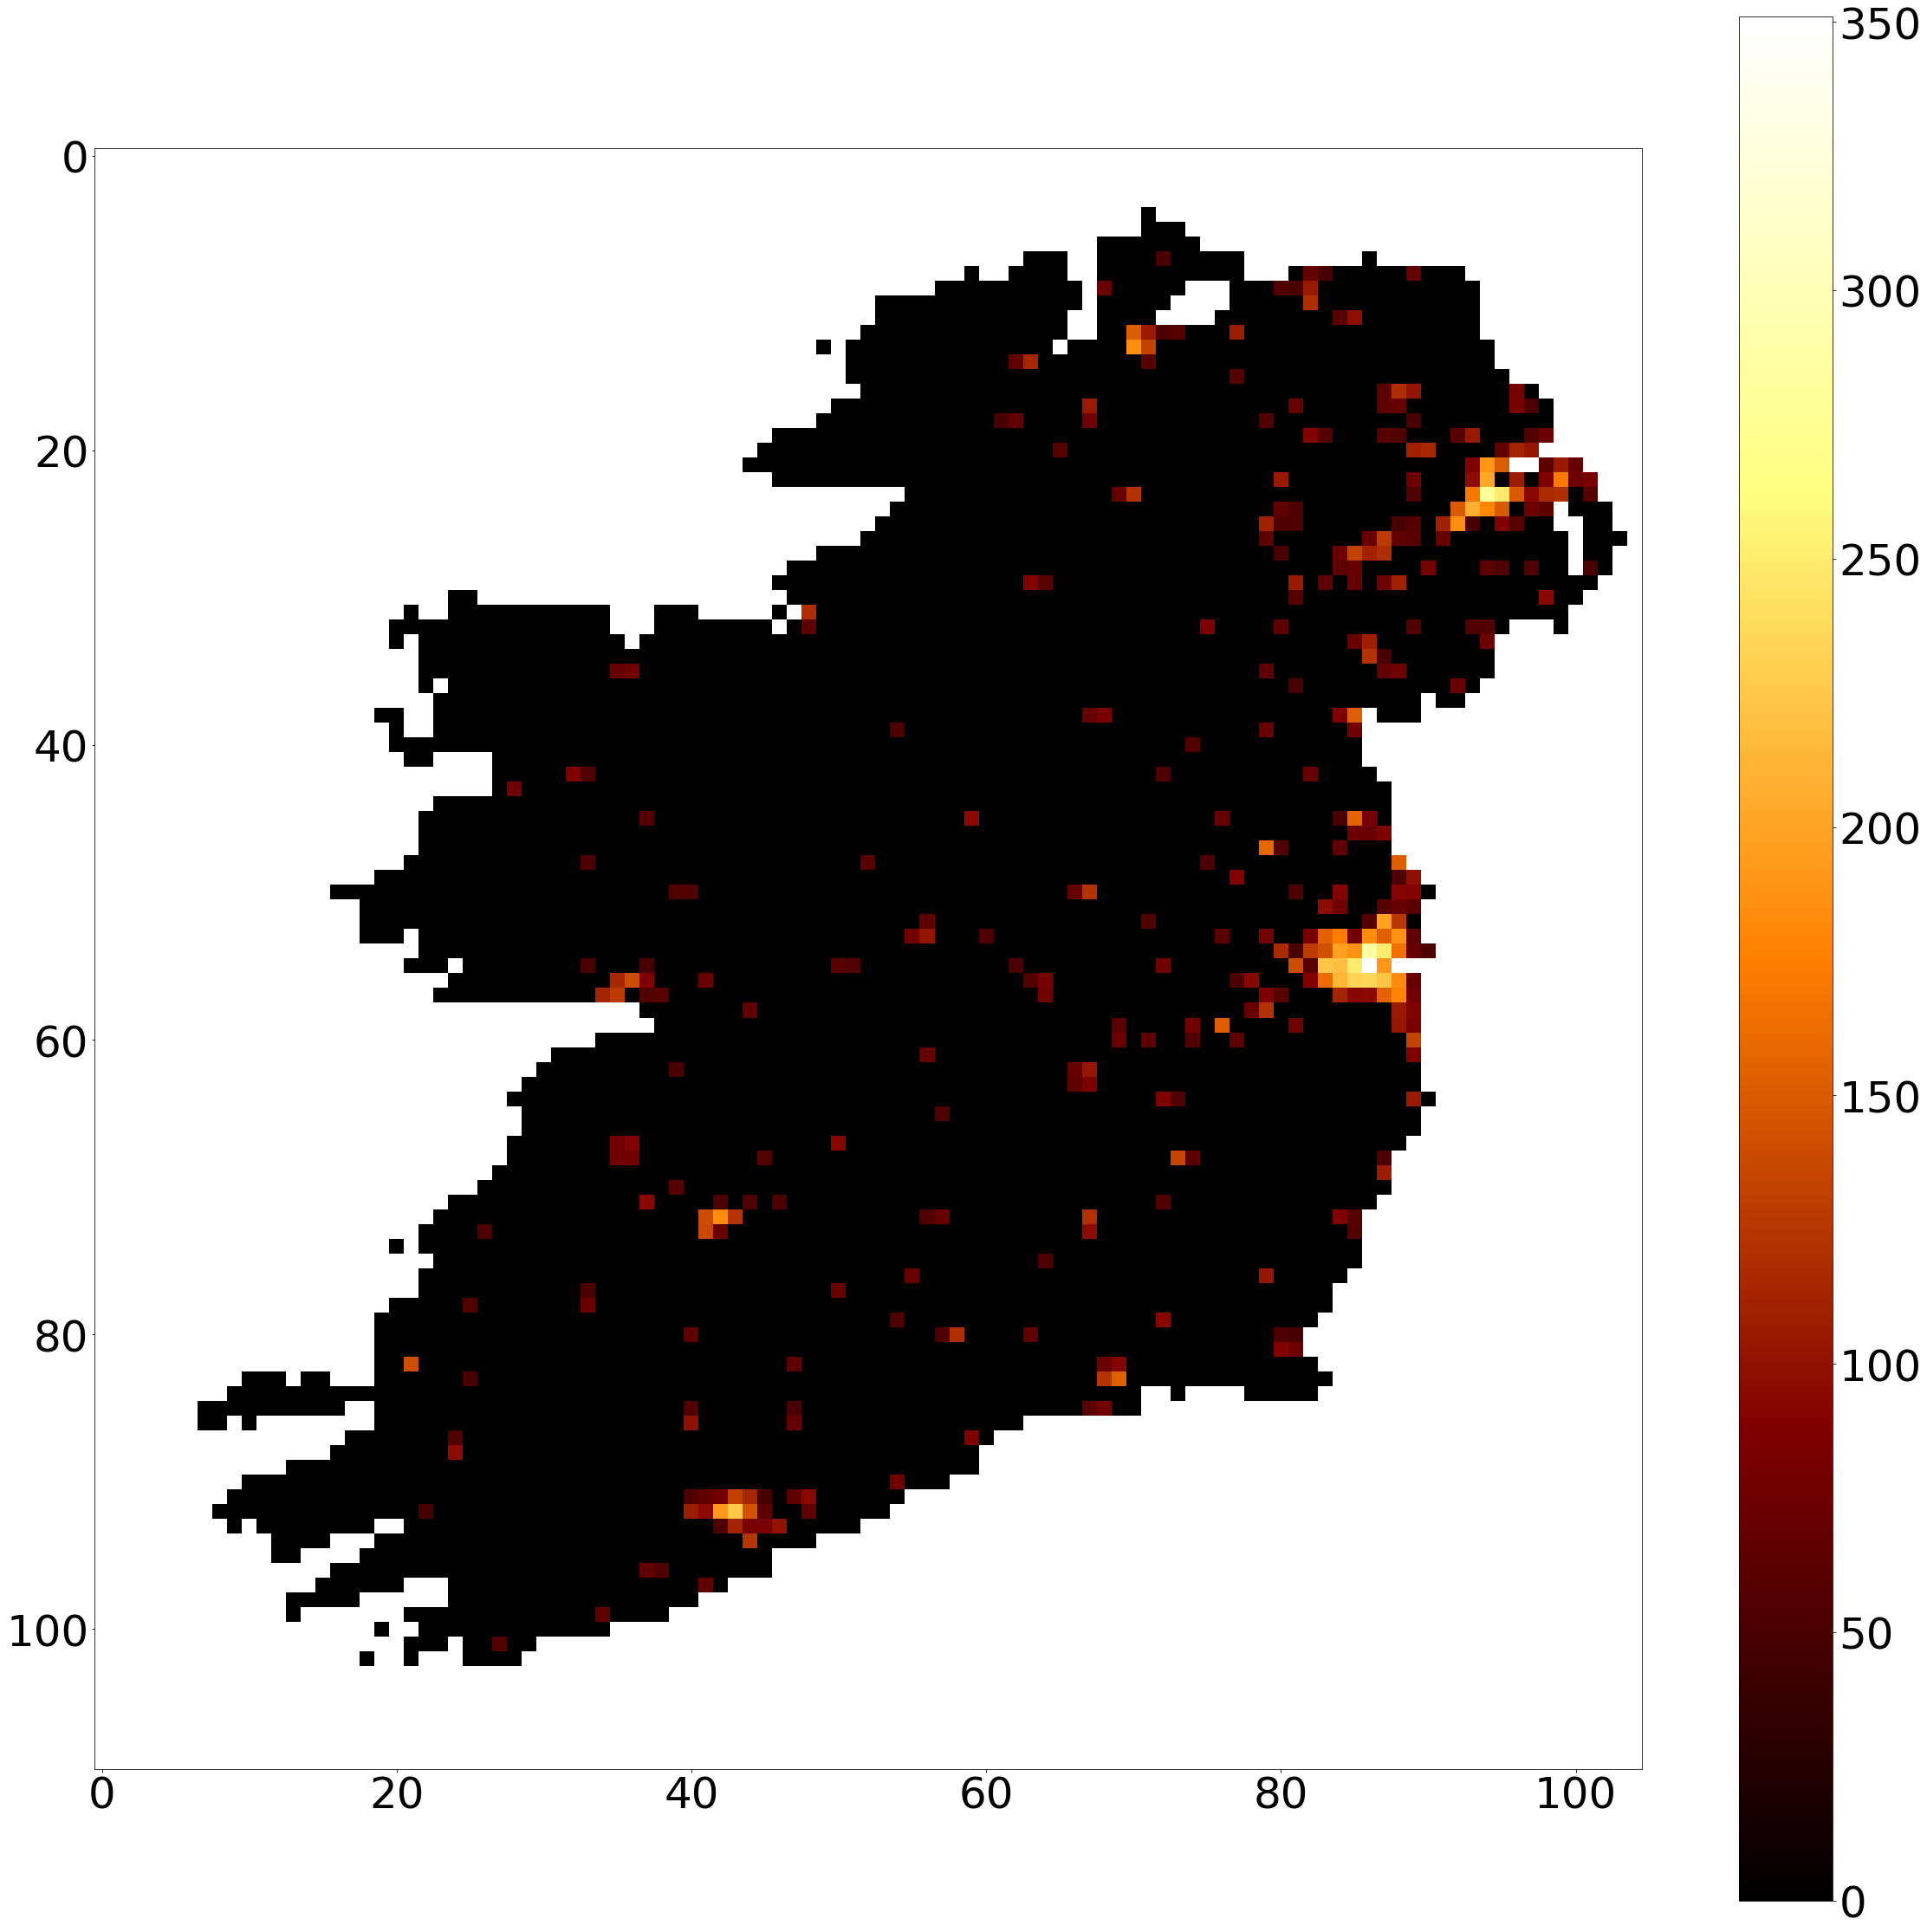

In [24]:
fig, ax = plt.subplots( figsize=(40, 40))
plot=ax.imshow(ndf.values**0.5, cmap="afmhot")
fig.colorbar(plot)

In [25]:
ndf=np.where(ndf>1, ndf, np.nan)
ndf=pd.DataFrame(ndf)
ndf

,0,1,2,3,4,5,6,7,8,9,...,95,96,97,98,99,100,101,102,103,104
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


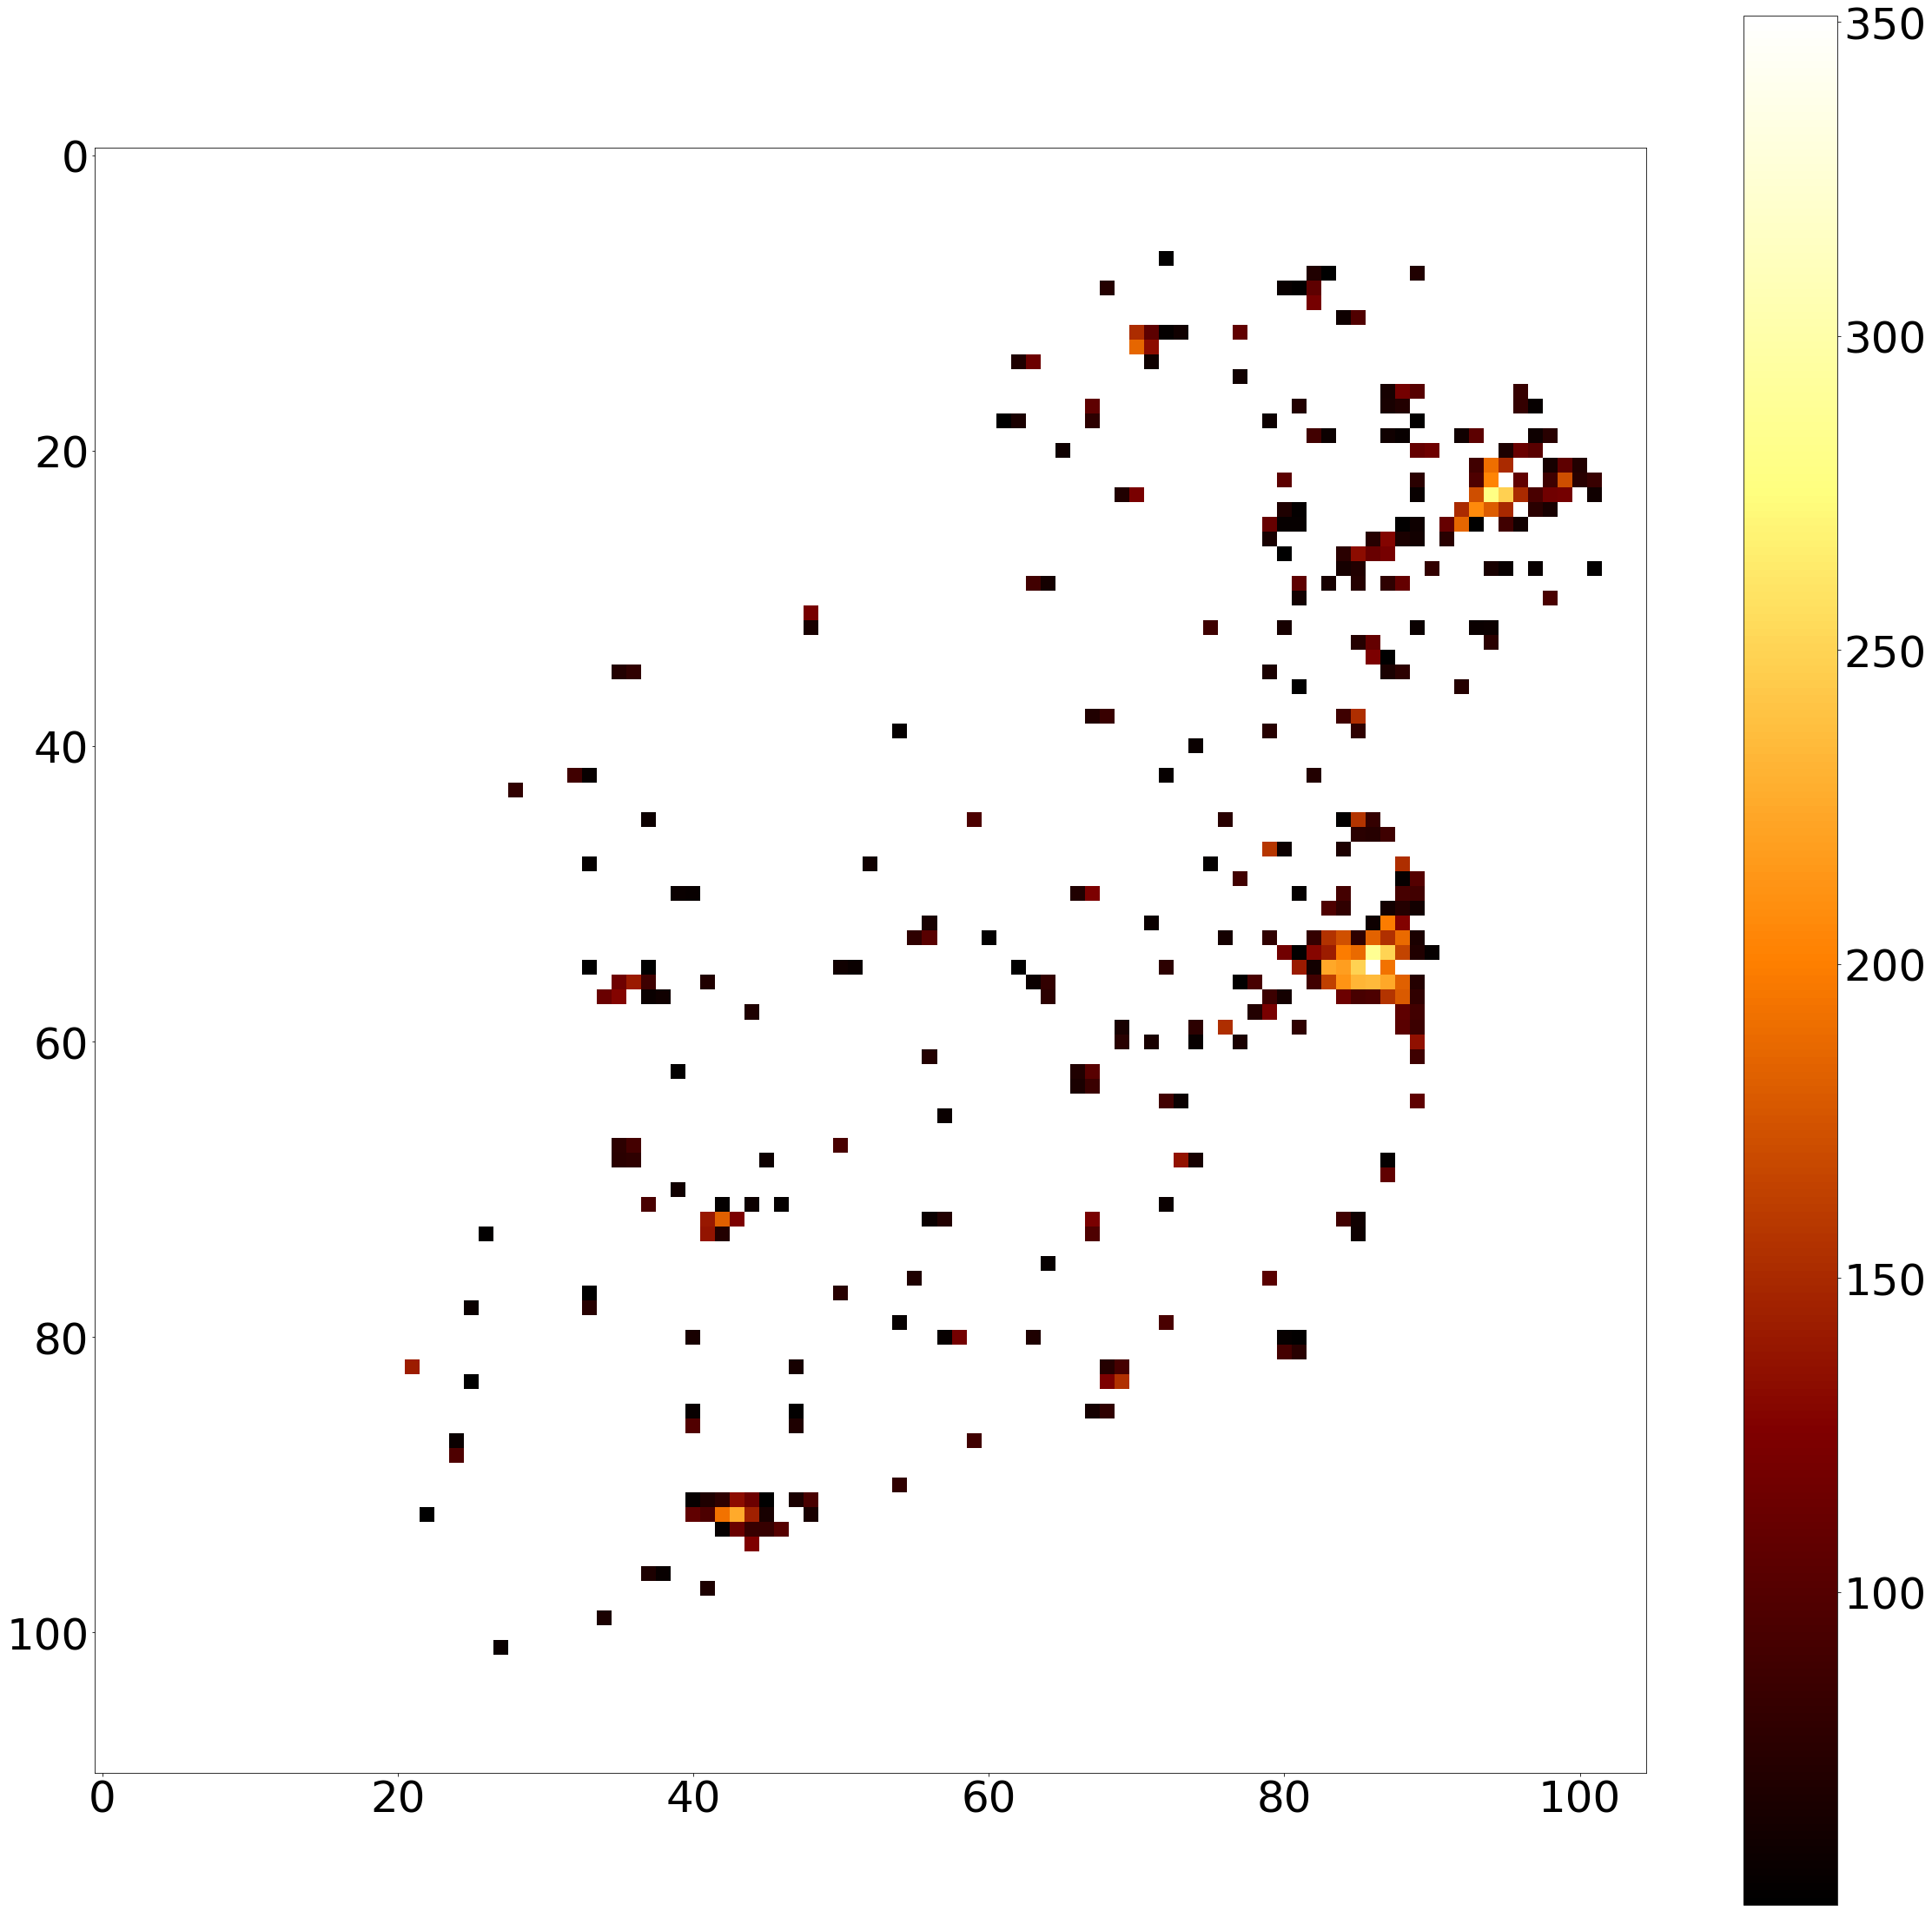

In [26]:
fig, ax = plt.subplots( figsize=(40, 40))
plot=ax.imshow(ndf.values**0.5, cmap="afmhot")
fig.colorbar(plot)

In [27]:
np.array(list(ndf.count())).sum()

374

In [28]:
VAL=ndf.values

In [29]:
import math
print(math.isnan(VAL[0][0]))
print(math.isnan(VAL[50][66]))

True
False


In [30]:
dic={}
dic2={}
lis=[]

for i in range(len(VAL)):
    for j in range(len(VAL[0])):
        if not math.isnan(VAL[i][j]):
            dic['[{0},{1}]'.format(j, i)]=VAL[i][j]
            dic2[VAL[i][j]]=[j, i]
            lis.append([j, i, VAL[i][j]])

In [31]:
len(dic)

374

In [32]:
len(np.unique(list(dic.values())))

374

In [33]:
dic2

{2649.716228: [72, 7],
 4843.815504: [82, 8],
 2591.2913079: [83, 8],
 4779.459910657: [89, 8],
 5141.550039999999: [68, 9],
 3023.732015: [80, 9],
 2688.9222707: [81, 9],
 11243.537827: [82, 9],
 14425.485892: [82, 10],
 3475.8178241: [84, 11],
 9658.121437499998: [85, 11],
 22971.418958000002: [70, 12],
 10976.077159999999: [71, 12],
 2788.7067601: [72, 12],
 3588.698929: [73, 12],
 11671.936369: [77, 12],
 34523.46972: [70, 13],
 17745.516843: [71, 13],
 4698.398996700002: [62, 14],
 12969.131026000001: [63, 14],
 3536.122757: [71, 14],
 3637.056942: [77, 15],
 4115.675179999999: [87, 16],
 14258.258696: [88, 16],
 10348.843057: [89, 16],
 6727.170228: [96, 16],
 11186.053670000001: [67, 17],
 4965.151985: [81, 17],
 4138.476842: [87, 17],
 5038.0787537: [88, 17],
 6616.9614119: [96, 17],
 2934.9116943000004: [97, 17],
 2627.857033: [61, 18],
 4407.676797: [62, 18],
 5921.331953: [67, 18],
 3388.117447: [79, 18],
 2673.4822010000003: [89, 18],
 8080.32297: [82, 19],
 3328.8225469999

In [34]:
lis

[[72, 7, 2649.716228],
 [82, 8, 4843.815504],
 [83, 8, 2591.2913079],
 [89, 8, 4779.459910657],
 [68, 9, 5141.550039999999],
 [80, 9, 3023.732015],
 [81, 9, 2688.9222707],
 [82, 9, 11243.537827],
 [82, 10, 14425.485892],
 [84, 11, 3475.8178241],
 [85, 11, 9658.121437499998],
 [70, 12, 22971.418958000002],
 [71, 12, 10976.077159999999],
 [72, 12, 2788.7067601],
 [73, 12, 3588.698929],
 [77, 12, 11671.936369],
 [70, 13, 34523.46972],
 [71, 13, 17745.516843],
 [62, 14, 4698.398996700002],
 [63, 14, 12969.131026000001],
 [71, 14, 3536.122757],
 [77, 15, 3637.056942],
 [87, 16, 4115.675179999999],
 [88, 16, 14258.258696],
 [89, 16, 10348.843057],
 [96, 16, 6727.170228],
 [67, 17, 11186.053670000001],
 [81, 17, 4965.151985],
 [87, 17, 4138.476842],
 [88, 17, 5038.0787537],
 [96, 17, 6616.9614119],
 [97, 17, 2934.9116943000004],
 [61, 18, 2627.857033],
 [62, 18, 4407.676797],
 [67, 18, 5921.331953],
 [79, 18, 3388.117447],
 [89, 18, 2673.4822010000003],
 [82, 19, 8080.32297],
 [83, 19, 3328.8

In [35]:
DF=pd.DataFrame(lis)
DF

,0,1,2
0,72,7,2649.716228
1,82,8,4843.815504
2,83,8,2591.291308
3,89,8,4779.459911
4,68,9,5141.550040
...,...,...,...
369,37,96,4596.917536
370,38,96,3112.219993
371,41,97,4503.274241
372,34,99,4352.471299


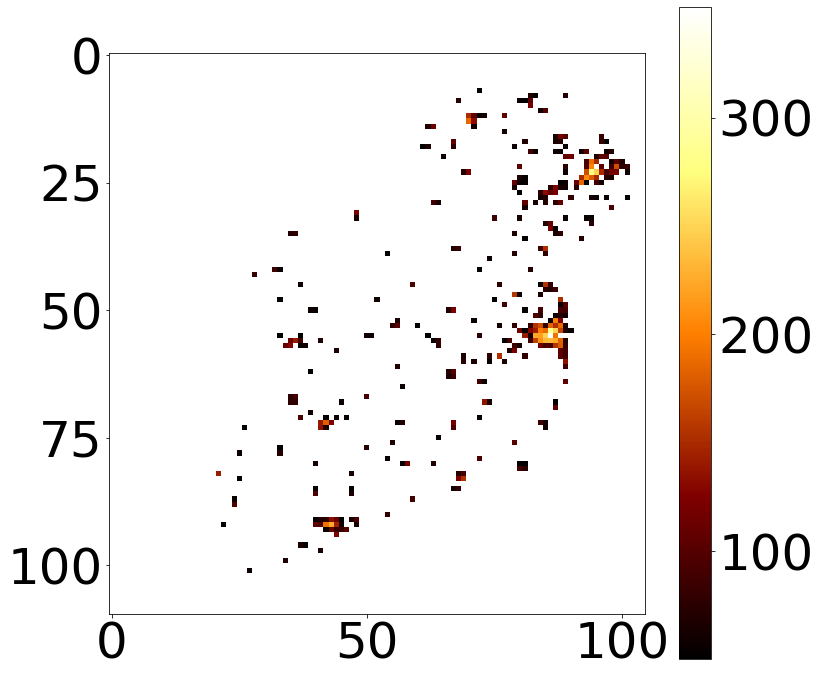

In [36]:
fig, ax = plt.subplots( figsize=(12, 12))
plot=ax.imshow(ndf.values**0.5, cmap="afmhot")
fig.colorbar(plot)

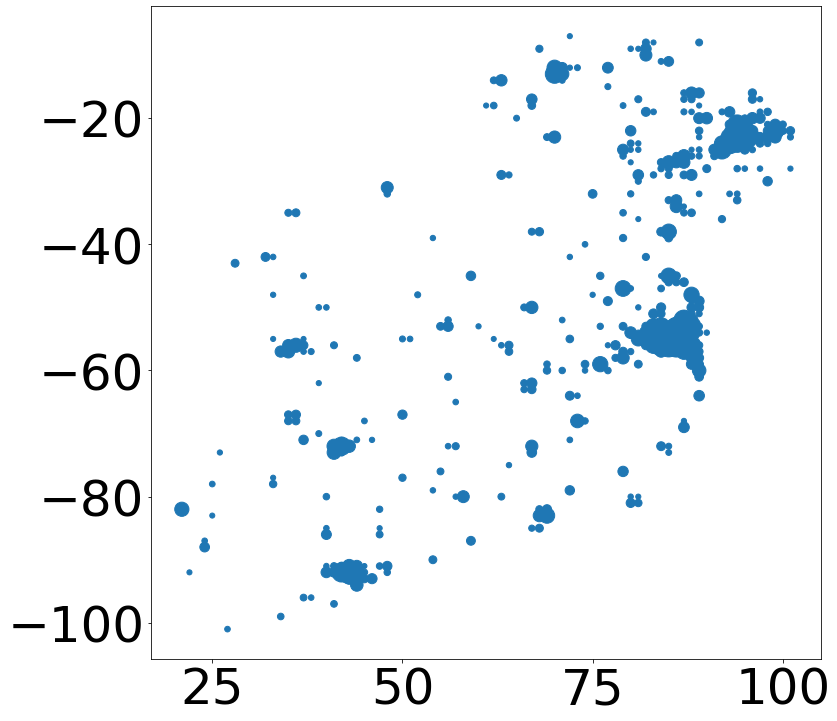

In [37]:
fig, ax = plt.subplots( figsize=(12, 12))
ax.scatter(DF[0],-DF[1],s=DF[2]/100)

In [38]:
DF.to_csv(r'O:\Desktop\WORLDMAP\IRLMAP_NEW.csv', sep=',', index=True)

In [39]:
DF=pd.read_csv(r'O:\Desktop\WORLDMAP\IRLMAP_NEW.csv', index_col=0)
DF

,0,1,2
0,72,7,2649.716228
1,82,8,4843.815504
2,83,8,2591.291308
3,89,8,4779.459911
4,68,9,5141.550040
...,...,...,...
369,37,96,4596.917536
370,38,96,3112.219993
371,41,97,4503.274241
372,34,99,4352.471299


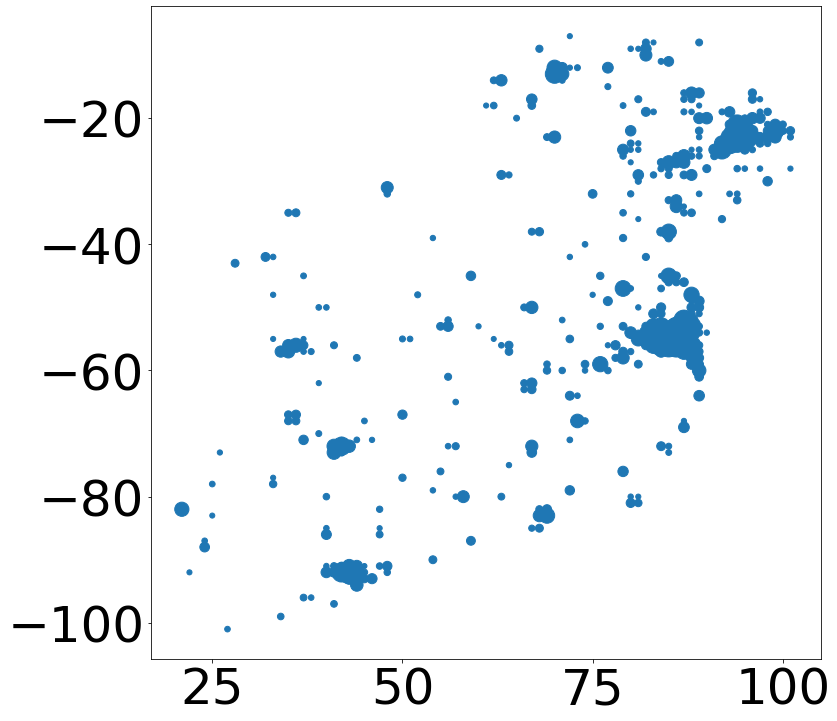

In [40]:
fig, ax = plt.subplots(figsize=(12, 12))
ax.scatter(DF['0'],-DF['1'],s=DF['2']/100)

How much data did we lose? 6551319.200469393 was the original sum.

In [41]:
DF['2'].sum()

4074762.8577740956

In [42]:
print(4074762.8577740956/6551319.200469393)

0.6219759308143838


So we still have 62% of the data. This will suffice.

(-110, 0)

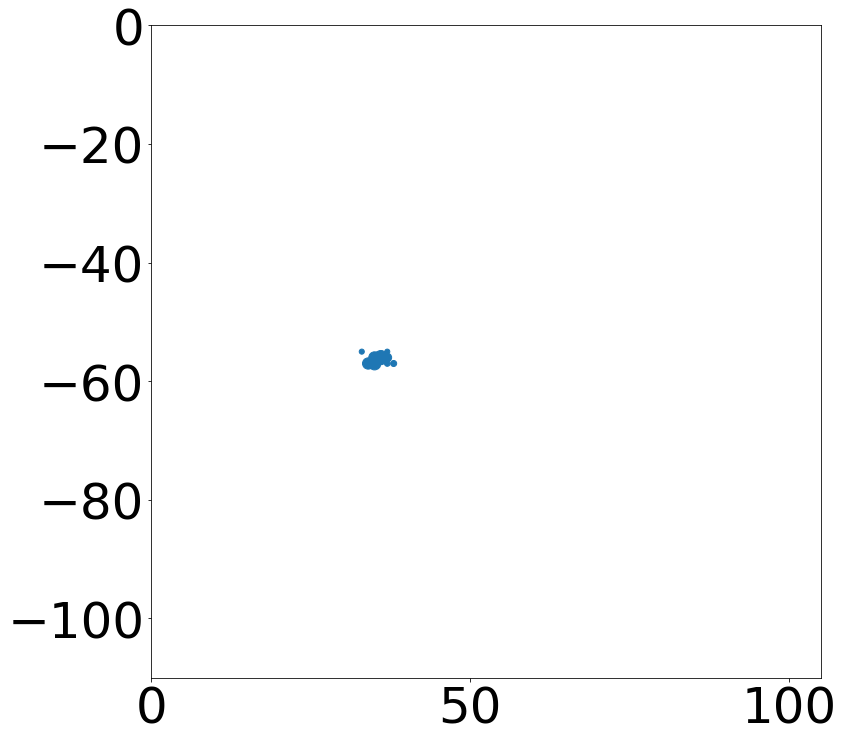

In [43]:
x=DF[DF['0']<40]
x=x[x['0']>27]
x=x[-x['1']>-60]
x=x[-x['1']<-50]
fig, ax = plt.subplots(figsize=(12, 12))
ax.scatter(x['0'],-x['1'],s=x['2']/100)
ax.set_xlim([0, 105])
ax.set_ylim([-110, -0])

In [44]:
x['2'].sum()

81887.163439935

In [45]:
DF['3']=0
DF['4']=0
DF['5']=DF['2']
DF['6']=0
DF['7']=0
DF.columns=['x', '-y', 'T', 'I', 'D', 'S', 'Q', 'R']

In [46]:
DF['I'][200]=1000
DF['S'][200]=DF['T'][200]-DF['I'][200]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


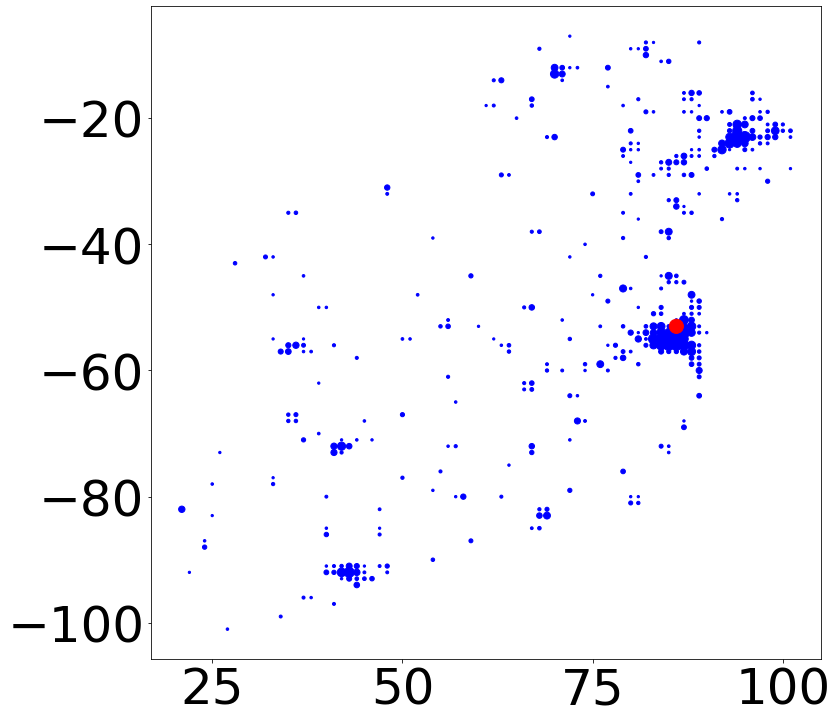

In [47]:
fig, ax = plt.subplots(figsize=(12, 12))
ax.scatter(DF['x'],-DF['-y'],s=DF['T']/500, c='blue')
ax.scatter(DF['x'],-DF['-y'],s=DF['I']/5, c='red')

In [48]:
Idf=DF[DF['I']>0]
Idf

,x,-y,T,I,D,S,Q,R
200,86,53,33788.825868,1000,0,32788.825868,0,0


TOTAL: 4074762.8577740956 FROM ORIGINAL 6551319.200469393

MODEL: 
$$ I_{new}(i \rightarrow j) = \alpha \frac{\left(S_j + \theta Q_j\right) I_i}{r^2}$$
if r=0, then $$ I_{new}(i \rightarrow i) = \alpha_0{\left(S_i + \theta Q_i\right) I_i}$$

$$ D_{new} = \beta \left(I+\varepsilon Q\right) $$
$$ Q_{new} = \gamma \left(I+\eta S\right) $$
$$ R_{new} = \sigma \left(I+\zeta Q\right) $$

In [92]:
def prochain(idf, alpha=0.0001, alpha_0=0.0002, theta=0, beta=0.02, eps=0, gamma=0, eta=0, sigma=0, zeta=0):
    """Given the current state and various probability, predicts the next state"""
    df=idf.copy()
    df1=idf.copy()
    
    df['I_new']=0
    df['D_new']=0
    df['Q_new']=0
    df['R_new']=0
    
    df['s_contrib_Q']=gamma*eta*df['S']
    df['q_contrib_D']=beta*eps*df['Q']
    df['q_contrib_R']=sigma*zeta*df['Q']
    df['i_contrib_D']=beta*df['I']
    df['i_contrib_Q']=gamma*df['I']
    df['i_contrib_R']=sigma*df['I']
    df['s_contrib_I']=0
    df['q_contrib_I']=0
    
    infected=df[df['I']>0]
    
    for i in infected.index.values: #for each infected
        #print(i)
        for j in range(df.shape[0]): #for each region
            if i==j: #i.e. i to i or j to j
                df['s_contrib_I'][j]=infected['s_contrib_I'][i]+alpha_0 * infected['I'][i] * infected['S'][i]
                df['q_contrib_I'][j]=infected['q_contrib_I'][i]+alpha_0 * infected['I'][i] * theta*infected['Q'][i]
            else: #i.e. i to j
                x=df['x'][i]-df['x'][j]
                y=df['-y'][i]-df['-y'][j]
                r_2=(abs(x)**2+abs(y)**2)
                df['s_contrib_I'][j]=df['s_contrib_I'][j]+infected['I'][i] * df['S'][j] * 1/r_2 * alpha
                df['q_contrib_I'][j]=df['q_contrib_I'][j]+infected['I'][i] * theta*df['Q'][j] * 1/r_2 * alpha
    
    df['s_contrib']=df['s_contrib_Q']+df['s_contrib_I']
    df['q_contrib']=df['q_contrib_D']+df['q_contrib_R']+df['q_contrib_I']
    df['i_contrib']=df['i_contrib_D']+df['i_contrib_Q']+df['i_contrib_R']
    
    df['s_contrib_Q'], df['s_contrib_I']=np.where(df['s_contrib']>df['S'], [df['S']*df['s_contrib_Q']/(df['s_contrib']), df['S']*df['s_contrib_I']/(df['s_contrib'])], [df['s_contrib_Q'], df['s_contrib_I']])
    df['q_contrib_D'], df['q_contrib_R'], df['q_contrib_I']=np.where(df['q_contrib']>df['Q'], [df['Q']*df['q_contrib_D']/df['q_contrib'], df['Q']*df['q_contrib_R']/df['q_contrib'], df['Q']*df['q_contrib_I']/df['q_contrib']], [df['q_contrib_D'], df['q_contrib_R'], df['q_contrib_I']])
    df['i_contrib_D'], df['i_contrib_R'], df['i_contrib_Q']=np.where(df['i_contrib']>df['I'], [df['I']*df['i_contrib_D']/df['i_contrib'], df['I']*df['i_contrib_R']/df['i_contrib'], df['I']*df['i_contrib_Q']/df['i_contrib']], [df['i_contrib_D'], df['i_contrib_R'], df['i_contrib_Q']])
    
    df['I_new']=df['I_new']+df['q_contrib_I']+df['s_contrib_I']
    df['D_new']=df['D_new']+df['q_contrib_D']+df['i_contrib_D']
    df['Q_new']=df['Q_new']+df['s_contrib_Q']+df['i_contrib_Q']
    df['R_new']=df['R_new']+df['q_contrib_R']+df['i_contrib_R']
    
    df1['I']=df['I']+df['I_new']-df['i_contrib']
    df1['D']=df['D']+df['D_new']
    df1['Q']=df['Q']+df['Q_new']-df['q_contrib']
    df1['R']=df['R']+df['R_new']
    df1['S']=df['S']-df['s_contrib']
    
    
    return df1

In [93]:
lol=prochain(DF, 0.0001, 0.0002, 0)
lol.iloc[200, :]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value i

x        86.000000
-y       53.000000
T     33788.825868
I      7537.000000
D        20.000000
S     26231.825868
Q         0.000000
R         0.000000
Name: 200, dtype: float64

In [94]:
new=prochain(DF, 0.0001, 0.0002, 0)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value i

In [95]:
DF.iloc[200, :]

x        86.000000
-y       53.000000
T     33788.825868
I      1000.000000
D         0.000000
S     32788.825868
Q         0.000000
R         0.000000
Name: 200, dtype: float64

In [96]:
new.iloc[200, :]

x        86.000000
-y       53.000000
T     33788.825868
I      7537.000000
D        20.000000
S     26231.825868
Q         0.000000
R         0.000000
Name: 200, dtype: float64

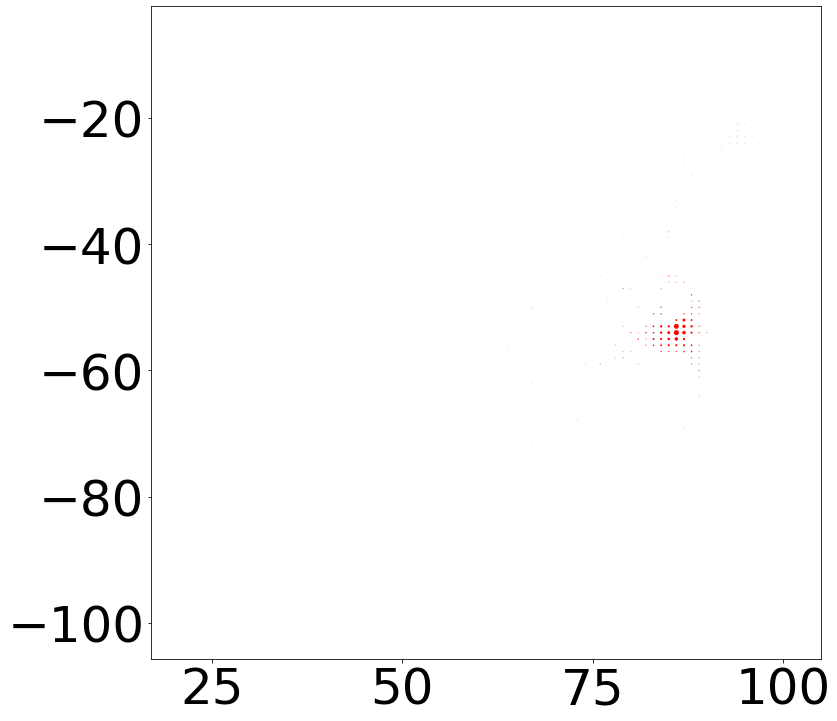

In [97]:
fig, ax = plt.subplots(figsize=(12, 12))
#ax.scatter(new['x'],-new['-y'],s=new['T']/500, c='blue')
ax.scatter(new['x'],-new['-y'],s=new['I']/500, c='red')

In [98]:
new1=prochain(new, 0.0001, 0.0002, 0)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value i

In [99]:
new1.iloc[200, :]

x        86.000000
-y       53.000000
T     33788.825868
I     33618.085868
D       170.740000
S    -53058.174132
Q         0.000000
R         0.000000
Name: 200, dtype: float64

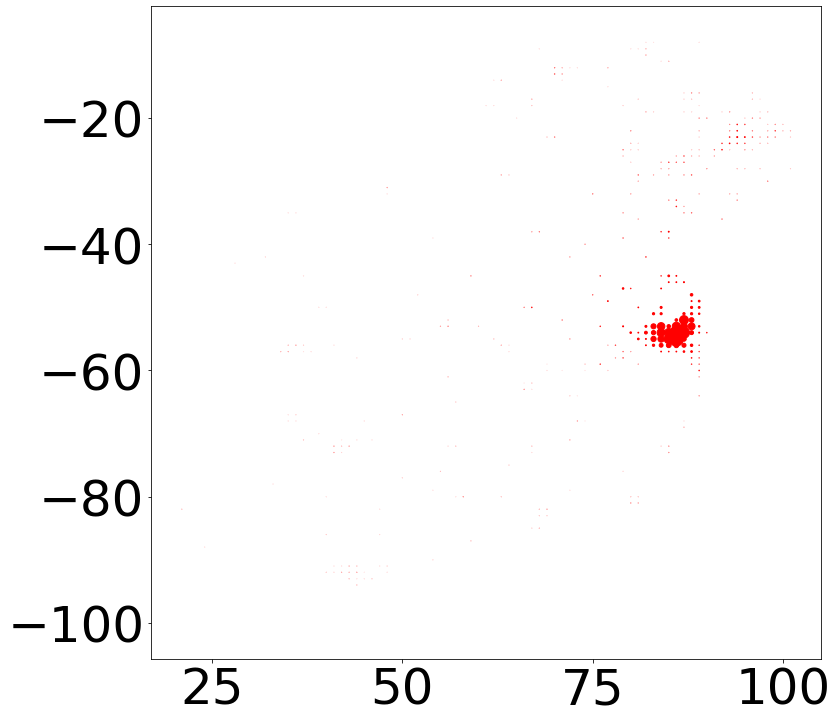

In [100]:
fig, ax = plt.subplots(figsize=(12, 12))
ax.scatter(new1['x'],-new1['-y'],s=new1['I']/500, c='red')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value i

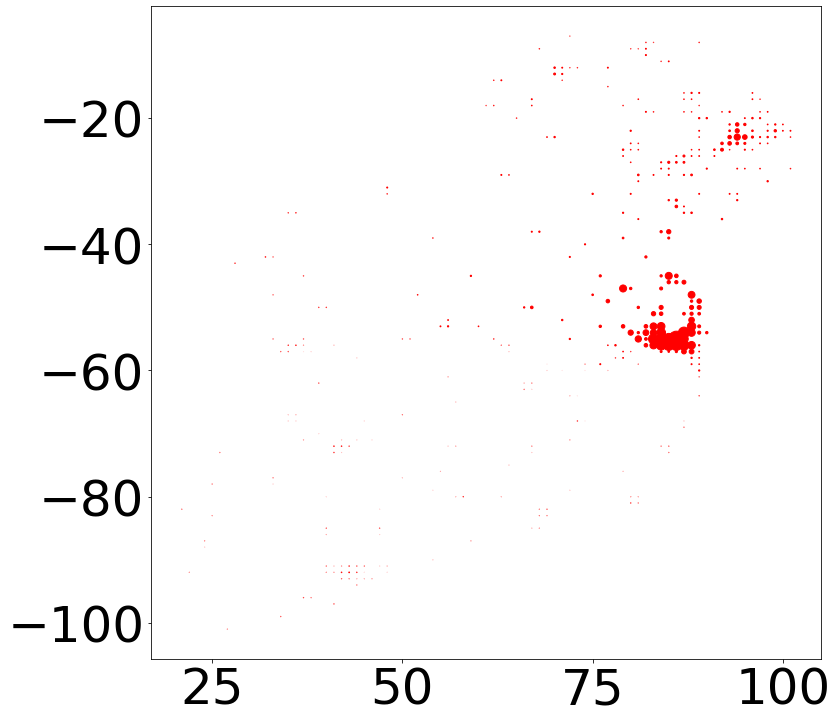

In [101]:
new2=prochain(new1, 0.0001, 0.0002, 0)
fig, ax = plt.subplots(figsize=(12, 12))
ax.scatter(new2['x'],-new2['-y'],s=new2['I']/500, c='red')

In [102]:
new2.iloc[200, :]

x     8.600000e+01
-y    5.300000e+01
T     3.378883e+04
I    -1.466021e+06
D     8.431017e+02
S     1.445909e+06
Q     0.000000e+00
R     0.000000e+00
Name: 200, dtype: float64

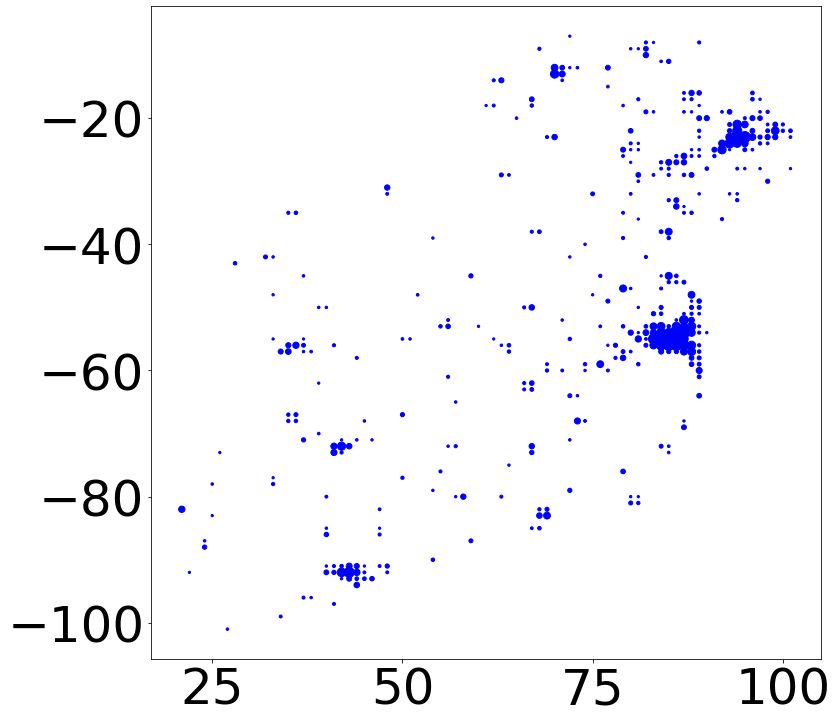

In [103]:
fig, ax = plt.subplots(figsize=(12, 12))
ax.scatter(DF['x'],-DF['-y'],s=DF['T']/500, c='blue')

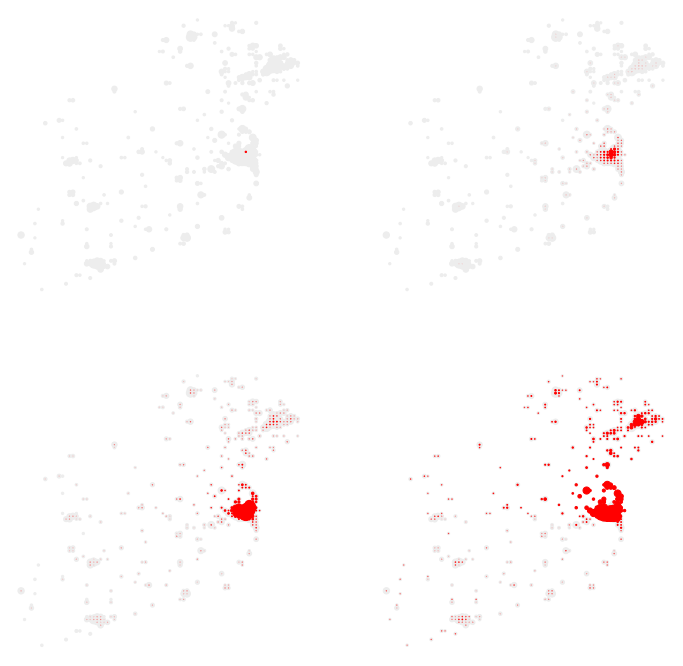

In [104]:
fig, ax = plt.subplots(2,2,figsize=(12, 12))

def animate(i):
    if i==0:
        ax[0][0].scatter(DF['x'],-DF['-y'],s=DF['T']/500, c='#ededed')
        ax[0][0].scatter(DF['x'],-DF['-y'],s=DF['I']/500, c='red')
        ax[0][0].axis('off')
    if i==1:
        ax[0][1].scatter(DF['x'],-DF['-y'],s=DF['T']/500, c='#ededed')
        ax[0][1].scatter(new['x'],-new['-y'],s=new['I']/500, c='red')
        ax[0][1].axis('off')
    if i==2:
        ax[1][0].scatter(DF['x'],-DF['-y'],s=DF['T']/500, c='#ededed')
        ax[1][0].scatter(new1['x'],-new1['-y'],s=new1['I']/500, c='red')
        ax[1][0].axis('off')
    if i==3:
        ax[1][1].scatter(DF['x'],-DF['-y'],s=DF['T']/500, c='#ededed')
        ax[1][1].scatter(new2['x'],-new2['-y'],s=new2['I']/500, c='red')
        ax[1][1].axis('off')
        
for i in range(4):
    animate(i)


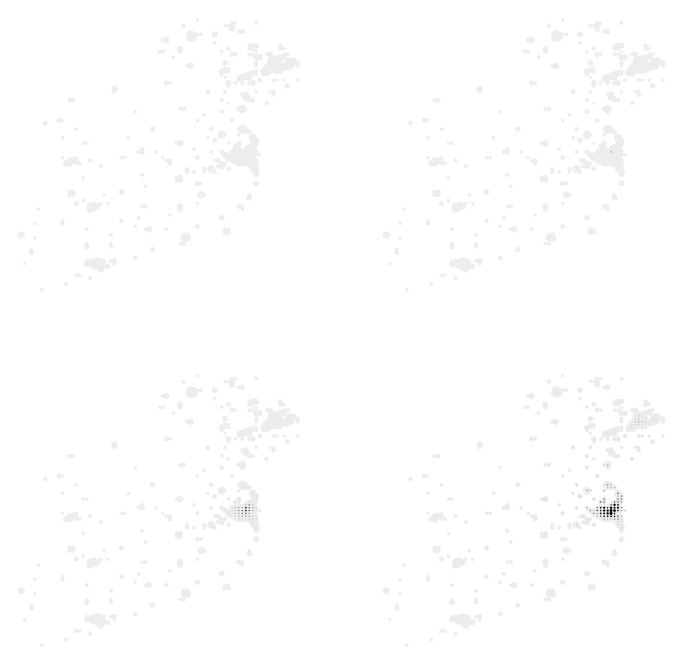

In [106]:
fig, ax = plt.subplots(2,2,figsize=(12, 12))

def animate(i):
    if i==0:
        ax[0][0].scatter(DF['x'],-DF['-y'],s=DF['T']/500, c='#ededed')
        ax[0][0].scatter(DF['x'],-DF['-y'],s=DF['D']/500, c='black')
        ax[0][0].axis('off')
    if i==1:
        ax[0][1].scatter(DF['x'],-DF['-y'],s=DF['T']/500, c='#ededed')
        ax[0][1].scatter(new['x'],-new['-y'],s=new['D']/500, c='black')
        ax[0][1].axis('off')
    if i==2:
        ax[1][0].scatter(DF['x'],-DF['-y'],s=DF['T']/500, c='#ededed')
        ax[1][0].scatter(new1['x'],-new1['-y'],s=new1['D']/500, c='black')
        ax[1][0].axis('off')
    if i==3:
        ax[1][1].scatter(DF['x'],-DF['-y'],s=DF['T']/500, c='#ededed')
        ax[1][1].scatter(new2['x'],-new2['-y'],s=new2['D']/500, c='black')
        ax[1][1].axis('off')
        
for i in range(4):
    animate(i)